# Análisis Ecommerce - Análisis
### *Javier Ramírez*
---

## Índice

1. Importaciones
2. Creación de variables
3. Análisis
    - Cliente
    - Producto
    - Sesión
    - Localización
4. Conclusiones, Insights y KPIs

---

## 1. Importaciones

In [1]:
import warnings
# Ignorar todas las advertencias
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.ticker as ticker
import plotly.express as px

In [2]:
rc = {
    "axes.facecolor": "#F8F8F8",
    "figure.facecolor": "#F8F8F8",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7" + "30",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4
}

# Configuración del estilo de seaborn con el diccionario rc
sns.set(rc=rc)

# Definición de colores
color = sns.color_palette('Purples')[3]
paleta = sns.color_palette('seismic')[0:5]

# Configuración de espaciado vertical y horizontal entre subgráficos
plt.rcParams['figure.subplot.hspace'] = 0.33
plt.rcParams['figure.subplot.wspace'] = 0.33

In [3]:
df = pd.read_pickle('df.pickle')
df.head()

order_id                   product  quantity_ordered  price_each  \
0    141234                    iPhone                 1       700.0   
1    141235  Lightning Charging Cable                 1       14.95   
2    141236          Wired Headphones                 2       11.99   
3    141237          27in FHD Monitor                 1      149.99   
4    141238          Wired Headphones                 1       11.99   

           order_date                       purchase_address  
0 2019-01-22 21:25:00        944 Walnut St, Boston, MA 02215  
1 2019-01-28 14:15:00       185 Maple St, Portland, OR 97035  
2 2019-01-17 13:33:00  538 Adams St, San Francisco, CA 94016  
3 2019-01-05 20:33:00     738 10th St, Los Angeles, CA 90001  
4 2019-01-25 11:59:00          387 10th St, Austin, TX 73301

## 2. Creación de Variables

### 2.1. Variables a partir de la fecha

In [4]:
# Creación de nuevas columnas 'año', 'mes', 'día', 'hora', 'minuto' 
df['año'] = df['order_date'].dt.year
df['mes'] = df['order_date'].dt.month
df['dia'] = df['order_date'].dt.day
df['hora'] = df['order_date'].dt.hour
df['minuto'] = df['order_date'].dt.minute

In [5]:
df.query('año == 2020').shape

(34, 11)

Voy a eliminar los registros del año 2020 para trabajar unicamente en 2019.

In [6]:
df = df.query('año == 2019')

### 2.2. Precio de la compra

In [7]:
# Precio de la compra = Precio unitario * número de unidades
df['precio_compra'] = df['quantity_ordered']*df['price_each']

### 2.3. Agrupación de productos

In [8]:
df['product'].value_counts()

product
USB-C Charging Cable          21855
Lightning Charging Cable      21605
AAA Batteries (4-pack)        20609
AA Batteries (4-pack)         20558
Wired Headphones              18848
Apple Airpods Headphones      15521
Bose SoundSport Headphones    13295
27in FHD Monitor               7495
iPhone                         6838
27in 4K Gaming Monitor         6224
34in Ultrawide Monitor         6174
Google Phone                   5521
Flatscreen TV                  4793
Macbook Pro Laptop             4720
ThinkPad Laptop                4124
20in Monitor                   4096
Vareebadd Phone                2064
LG Washing Machine              666
LG Dryer                        646
Name: count, dtype: int64

Vemos que ya por el nombre podemos agrupar los productos en distintas categorias (cable, phone, monitor, etc.).

In [9]:
condiciones = [(df['product'].str.contains('Cable')), 
               (df['product'].str.contains('Batteries')),
               (df['product'].str.contains('Headphones')),
               (df['product'].str.contains('Monitor')),
               (df['product'].str.contains('Phone')),
               (df['product'].str.contains('Laptop')),
               (df['product'].str.contains('LG')),
               (df['product'].str.contains('TV'))]

resultados = ['Cable', 'Batteries', 'Headphones', 'Monitor', 'Phone', 'Laptop', 'Home Appliances', 'TV']

# Asignación de valores en la columna 'tipo_producto' basados en las condiciones y resultados definidos
df['tipo_producto'] = np.select(condiciones, resultados)
df.head()

order_id                   product  quantity_ordered  price_each  \
0    141234                    iPhone                 1       700.0   
1    141235  Lightning Charging Cable                 1       14.95   
2    141236          Wired Headphones                 2       11.99   
3    141237          27in FHD Monitor                 1      149.99   
4    141238          Wired Headphones                 1       11.99   

           order_date                       purchase_address   año  mes  dia  \
0 2019-01-22 21:25:00        944 Walnut St, Boston, MA 02215  2019    1   22   
1 2019-01-28 14:15:00       185 Maple St, Portland, OR 97035  2019    1   28   
2 2019-01-17 13:33:00  538 Adams St, San Francisco, CA 94016  2019    1   17   
3 2019-01-05 20:33:00     738 10th St, Los Angeles, CA 90001  2019    1    5   
4 2019-01-25 11:59:00          387 10th St, Austin, TX 73301  2019    1   25   

   hora  minuto  precio_compra tipo_producto  
0    21      25          700.0         Phone  
1    14      15          14.95         Cable  
2    13      33          23.98    Headphones  
3    20      33         149.99       Monitor  
4    11      59          11.99    Headphones

### 2.4. Variables a partir de la localización

In [10]:
# Dividir la dirección para quedarnos con la ciudad y el estado
loc = df.purchase_address.str.split(', ', expand=True).loc[:, 1:].rename(columns = {1:'ciudad', 2:'estado'})
loc['estado'] = loc.estado.str.split(' ', expand = True)[0]

# Añadir las columnas al dataset
df = pd.concat([df, loc], axis = 1)
loc.head()

ciudad estado
0         Boston     MA
1       Portland     OR
2  San Francisco     CA
3    Los Angeles     CA
4         Austin     TX

He conseguido una tabla con las abreviaturas de cada estado y sus nombres para poder entenderlos mejor.

La tabla la he conseguido de: https://es.wikipedia.org/wiki/Anexo:Abreviaciones_de_los_estados_de_Estados_Unidos

In [11]:
estados = pd.read_csv('Datos/es.csv')
estados.head()

tablescraper-selected-row
0         Estado|Abreviatura|Capital
1        Alabama → (AL) → Montgomery
2             Alaska → (AK) → Juneau
3       Arizona\n(AZ)        Phoenix
4  Arkansas\n(AR)        Little Rock

In [12]:
estados = estados.loc[1:50]
# Dividir entre el estado y la abreviatura
estados = estados['tablescraper-selected-row'].str.split('(', expand = True)
estados.head()

0                       1
1    Alabama →         AL) → Montgomery
2     Alaska →             AK) → Juneau
3     Arizona\n      AZ)        Phoenix
4    Arkansas\n  AR)        Little Rock
5  California\n   CA)        Sacramento

In [13]:
# Limpiar el dataset
estados[0] = estados[0].str.replace(' → ', '')
estados[0] = estados[0].str.replace('\n', '', regex = False)
estados[1] = estados[1].str[:2]
estados.head()

0   1
1     Alabama  AL
2      Alaska  AK
3     Arizona  AZ
4    Arkansas  AR
5  California  CA

In [14]:
# Añadir al dataset principal
df = pd.merge(left = df, right = estados, how = 'left', left_on = 'estado', right_on = 1).drop(columns = 1).rename(columns = {'estado':'estado_abv', 0:'estado'})
df.head()

order_id                   product  quantity_ordered  price_each  \
0    141234                    iPhone                 1       700.0   
1    141235  Lightning Charging Cable                 1       14.95   
2    141236          Wired Headphones                 2       11.99   
3    141237          27in FHD Monitor                 1      149.99   
4    141238          Wired Headphones                 1       11.99   

           order_date                       purchase_address   año  mes  dia  \
0 2019-01-22 21:25:00        944 Walnut St, Boston, MA 02215  2019    1   22   
1 2019-01-28 14:15:00       185 Maple St, Portland, OR 97035  2019    1   28   
2 2019-01-17 13:33:00  538 Adams St, San Francisco, CA 94016  2019    1   17   
3 2019-01-05 20:33:00     738 10th St, Los Angeles, CA 90001  2019    1    5   
4 2019-01-25 11:59:00          387 10th St, Austin, TX 73301  2019    1   25   

   hora  minuto  precio_compra tipo_producto         ciudad estado_abv  \
0    21      25          700.0         Phone         Boston         MA   
1    14      15          14.95         Cable       Portland         OR   
2    13      33          23.98    Headphones  San Francisco         CA   
3    20      33         149.99       Monitor    Los Angeles         CA   
4    11      59          11.99    Headphones         Austin         TX   

          estado  
0  Massachusetts  
1         Oregón  
2     California  
3     California  
4          Texas

---

## 3. Análisis

### 3.1. Cliente

In [15]:
df.query('purchase_address == "521 Park St, San Francisco, CA 94016"')

order_id                     product  quantity_ordered  price_each  \
220       141450                Google Phone                 1       600.0   
221       141450  Bose SoundSport Headphones                 1       99.99   
55533     194567    Apple Airpods Headphones                 1       150.0   
156518    291614    Lightning Charging Cable                 1       14.95   

                order_date                      purchase_address   año  mes  \
220    2019-01-12 11:16:00  521 Park St, San Francisco, CA 94016  2019    1   
221    2019-01-12 11:16:00  521 Park St, San Francisco, CA 94016  2019    1   
55533  2019-05-09 10:03:00  521 Park St, San Francisco, CA 94016  2019    5   
156518 2019-11-24 17:53:00  521 Park St, San Francisco, CA 94016  2019   11   

        dia  hora  minuto  precio_compra tipo_producto         ciudad  \
220      12    11      16          600.0         Phone  San Francisco   
221      12    11      16          99.99    Headphones  San Francisco   
55533     9    10       3          150.0    Headphones  San Francisco   
156518   24    17      53          14.95         Cable  San Francisco   

       estado_abv      estado  
220            CA  California  
221            CA  California  
55533          CA  California  
156518         CA  California

Podemos saber que se trata de un mismo cliente al haber realizado las compras desde la misma dirección.

In [16]:
# Agrupación de datos por la dirección de compra y agregación de varias estadísticas
clientes = df.groupby('purchase_address').agg({
    'order_date': ['nunique', 'max'], # Número de compras y fecha de la última
    'quantity_ordered': 'sum', # Número de productos comprados
    'precio_compra': 'sum', # Gasto total del cliente
    'tipo_producto': lambda x: x.mode().iat[0], # Tipo de producto que más ha comprado
    'ciudad': 'max', # Ciudad del cliente
    'estado': 'max' # Estado del cliente
}).reset_index()

# Renombrar las columnas del DataFrame resultante
clientes.columns = ['purchase_address', 'num_compras', 'fecha_ult_compra', 'num_productos', 'gasto_total', 'tipo_prod_mode', 'ciudad', 'estado']
clientes.head()

purchase_address  num_compras    fecha_ult_compra  \
0        1 11th St, Atlanta, GA 30301            1 2019-03-14 07:57:00   
1    1 11th St, Los Angeles, CA 90001            1 2019-10-21 18:33:00   
2  1 11th St, San Francisco, CA 94016            1 2019-09-13 05:33:00   
3    1 12th St, Los Angeles, CA 90001            1 2019-03-19 14:55:00   
4  1 12th St, New York City, NY 10001            1 2019-10-26 12:21:00   

   num_productos  gasto_total tipo_prod_mode         ciudad      estado  
0              1        11.95          Cable        Atlanta     Georgia  
1              1       1700.0         Laptop    Los Angeles  California  
2              1        700.0          Phone  San Francisco  California  
3              1        150.0     Headphones    Los Angeles  California  
4              1        11.99     Headphones  New York City  Nueva York

In [17]:
# Análisis descriptivo
clientes.describe().T

count                           mean  \
num_compras       140768.0                       1.267376   
fecha_ult_compra    140768  2019-08-02 22:51:37.810297600   
num_productos     140768.0                       1.483086   
gasto_total       140768.0                     244.777703   

                                  min                  25%  \
num_compras                       1.0                  1.0   
fecha_ult_compra  2019-01-01 03:07:00  2019-05-02 09:07:45   
num_productos                     1.0                  1.0   
gasto_total                      2.99                11.95   

                                  50%                  75%  \
num_compras                       1.0                  1.0   
fecha_ult_compra  2019-08-13 17:32:30  2019-11-07 20:16:45   
num_productos                     1.0                  2.0   
gasto_total                     99.99               379.99   

                                  max         std  
num_compras                       7.0    0.558526  
fecha_ult_compra  2019-12-31 23:53:00         NaN  
num_productos                    12.0    0.859299  
gasto_total                   4379.99  399.205088

- La gran mayoría de clientes solo compra una vez y un solo producto.
- Al haber datos atípicos, usaremos la mediana para saber cuánto dinero deja un cliente de media al año, en este caso $100.

In [18]:
# KIPs
print('En todo el año se han hecho ' + str(clientes.num_compras.sum()) + ' compras.')
print('En todo el año se han comprado ' + str(clientes.num_productos.sum()) + ' productos.')
print('En todo el año se han ingresado ' + str(round(clientes.gasto_total.sum(), 2)) + '$.')

En todo el año se han hecho 178406 compras.
En todo el año se han comprado 208771 productos.
En todo el año se han ingresado 34456867.65$.


#### Entendiendo la variable num_compras

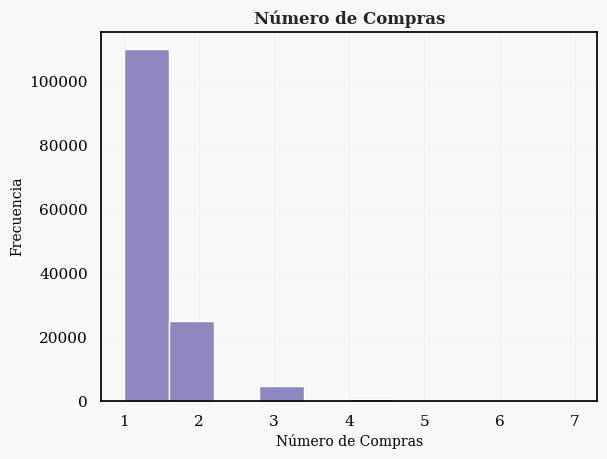

In [19]:
clientes.num_compras.plot.hist(color=color)
plt.title('Número de Compras', fontsize=12, fontweight='bold')
plt.xlabel('Número de Compras', fontsize=10)
plt.ylabel('Frecuencia', fontsize=10)
plt.show()

La mayoría de clientes realiza solo una compra.

#### Enteniendo la variable num_productos

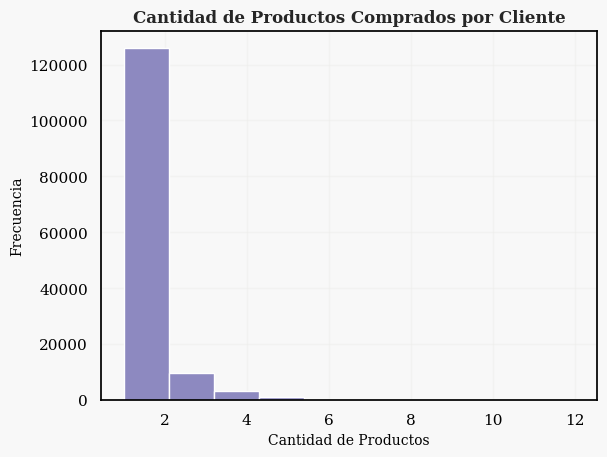

In [20]:
clientes.num_productos.plot.hist(color=color)
plt.title('Cantidad de Productos Comprados por Cliente', fontsize=12, fontweight='bold')
plt.xlabel('Cantidad de Productos', fontsize=10)
plt.ylabel('Frecuencia', fontsize=10)
plt.show()

La mayoría de clientes solo compra un producto.

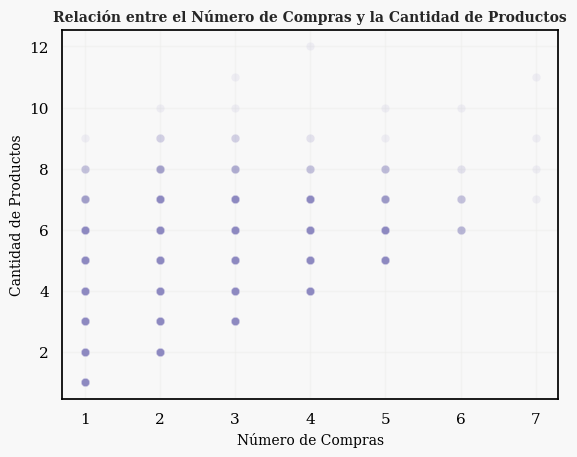

In [21]:
sns.scatterplot(data=clientes, x='num_compras', y='num_productos', alpha=0.1, color = color)
plt.title('Relación entre el Número de Compras y la Cantidad de Productos', fontsize=10, fontweight='bold')
plt.xlabel('Número de Compras', fontsize=10)
plt.ylabel('Cantidad de Productos', fontsize=10)
plt.show()

#### Enteniendo la variable gasto_total

In [22]:
# Top 10 clientes con más gasto
clientes.gasto_total.nlargest(10)

89026     4379.99
45613      4100.0
108735     4100.0
98836     3919.88
17174     3789.99
132908    3779.99
80305     3718.78
80059     3699.98
24666     3561.95
109060    3552.99
Name: gasto_total, dtype: Float64

In [23]:
# Top 10 clientes con menos gasto
clientes.gasto_total.nsmallest(10)

19     2.99
43     2.99
77     2.99
81     2.99
127    2.99
142    2.99
158    2.99
175    2.99
191    2.99
199    2.99
Name: gasto_total, dtype: Float64

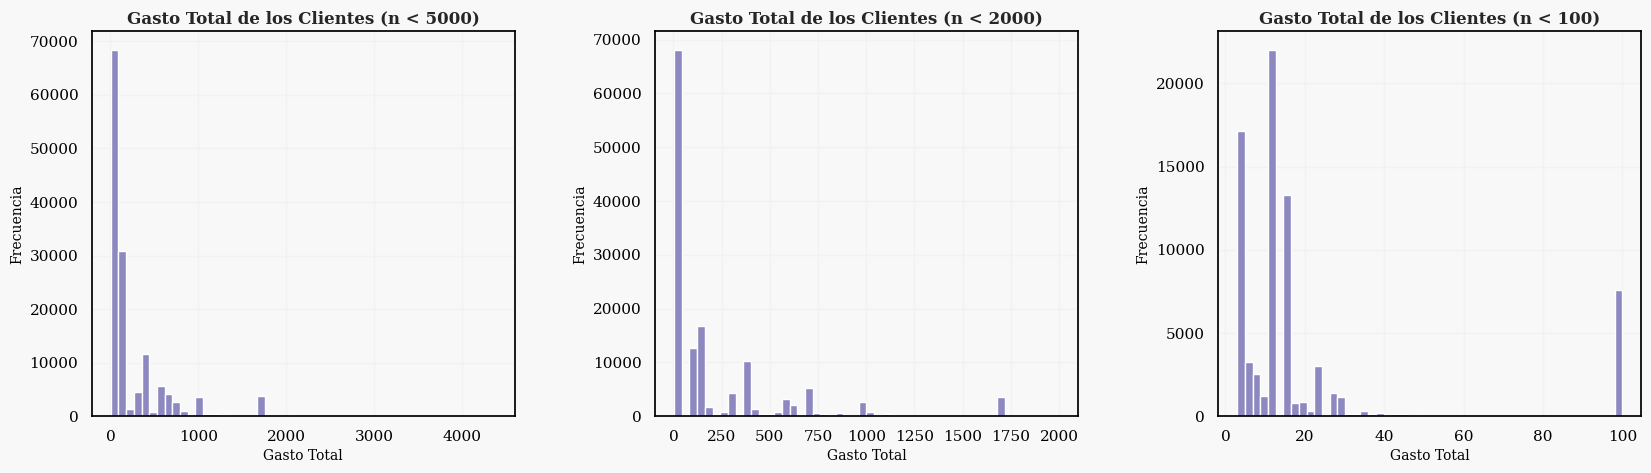

In [24]:
# Histograma para distintos rangos de valores
f, ax = plt.subplots(1, 3, figsize=(20, 5))

for i, n in enumerate([5000, 2000, 100]):
    clientes[clientes.gasto_total < n].gasto_total.plot.hist(bins=50, color=color, ax=ax[i])
    ax[i].set_title(f'Gasto Total de los Clientes (n < {n})', fontsize=12, fontweight='bold')  # Añadí un prefijo 'n <'
    ax[i].set_xlabel('Gasto Total', fontsize=10)  # Utilicé set_xlabel y set_ylabel en lugar de plt.xlabel y plt.ylabel
    ax[i].set_ylabel('Frecuencia', fontsize=10)

plt.show()

Como la gran mayoría de los clientes compran solo una vez, el dinero que gastan corresponde al precio del producto, siendo los que cuestan menos de $20 los más comprados.

In [25]:
# Cliente top 2 de gasto total
clientes.loc[45613]

purchase_address    391 1st St, Seattle, WA 98101
num_compras                                     2
fecha_ult_compra              2019-11-30 10:51:00
num_productos                                   3
gasto_total                                4100.0
tipo_prod_mode                             Laptop
ciudad                                    Seattle
estado                                 Washington
Name: 45613, dtype: object

In [26]:
df.query('purchase_address == "391 1st St, Seattle, WA 98101"')

order_id             product  quantity_ordered  price_each  \
67918     206413  Macbook Pro Laptop                 1      1700.0   
67919     206413              iPhone                 1       700.0   
148132    283565  Macbook Pro Laptop                 1      1700.0   

                order_date               purchase_address   año  mes  dia  \
67918  2019-05-07 09:41:00  391 1st St, Seattle, WA 98101  2019    5    7   
67919  2019-05-07 09:41:00  391 1st St, Seattle, WA 98101  2019    5    7   
148132 2019-11-30 10:51:00  391 1st St, Seattle, WA 98101  2019   11   30   

        hora  minuto  precio_compra tipo_producto   ciudad estado_abv  \
67918      9      41         1700.0        Laptop  Seattle         WA   
67919      9      41          700.0         Phone  Seattle         WA   
148132    10      51         1700.0        Laptop  Seattle         WA   

            estado  
67918   Washington  
67919   Washington  
148132  Washington

In [27]:
# CLiente top 3 de gasto total
clientes.loc[108735]

purchase_address    795 1st St, Atlanta, GA 30301
num_compras                                     2
fecha_ult_compra              2019-10-19 14:09:00
num_productos                                   3
gasto_total                                4100.0
tipo_prod_mode                             Laptop
ciudad                                    Atlanta
estado                                    Georgia
Name: 108735, dtype: object

In [28]:
df.query('purchase_address == "795 1st St, Atlanta, GA 30301"')

order_id             product  quantity_ordered  price_each  \
119354    255887              iPhone                 1       700.0   
119355    255887  Macbook Pro Laptop                 1      1700.0   
138079    273897  Macbook Pro Laptop                 1      1700.0   

                order_date               purchase_address   año  mes  dia  \
119354 2019-09-23 04:27:00  795 1st St, Atlanta, GA 30301  2019    9   23   
119355 2019-09-23 04:27:00  795 1st St, Atlanta, GA 30301  2019    9   23   
138079 2019-10-19 14:09:00  795 1st St, Atlanta, GA 30301  2019   10   19   

        hora  minuto  precio_compra tipo_producto   ciudad estado_abv   estado  
119354     4      27          700.0         Phone  Atlanta         GA  Georgia  
119355     4      27         1700.0        Laptop  Atlanta         GA  Georgia  
138079    14       9         1700.0        Laptop  Atlanta         GA  Georgia

In [29]:
mac = df.query('product == "Macbook Pro Laptop"').loc[df.query('product == "Macbook Pro Laptop"').duplicated(subset = 'purchase_address')]
print('Número de clientes que han comprado más de un Macbook Pro Laptop: ', mac.shape[0])

Número de clientes que han comprado más de un Macbook Pro Laptop:  39




Hay 39 clientes que han comprado más de un Macbook Pro a lo largo del año, algo bastante inusual. Habría que ver si el próximo año continúan comprando para tenerlos más de cerca.

In [30]:
# Ciudades donde residen esos 39 clientes
mac.ciudad.value_counts()

ciudad
San Francisco    16
Los Angeles       5
Boston            4
New York City     3
Austin            3
Atlanta           3
Seattle           3
Dallas            1
Portland          1
Name: count, dtype: int64

#### ¿Los clientes repiten compras en los siguientes meses?

Para responder a esta pregunta, llevaremos a cabo un análisis de cohortes, una técnica utilizada para comprender el comportamiento de los clientes a lo largo del tiempo.

En esta técnica, partimos de un grupo de clientes que realizaron su primera compra en el mes 1, y calculamos cuántos de ellos efectuaron una segunda compra en el mes 2, en el mes 3, y así sucesivamente. De esta forma, conseguimos averiguar cuál es el porcentaje de clientes que continúan comprando después de su primera compra y cuánto tiempo transcurre hasta que lo hacen.

In [31]:
color

(0.5513264129181085, 0.537916186082276, 0.7524490580545944)

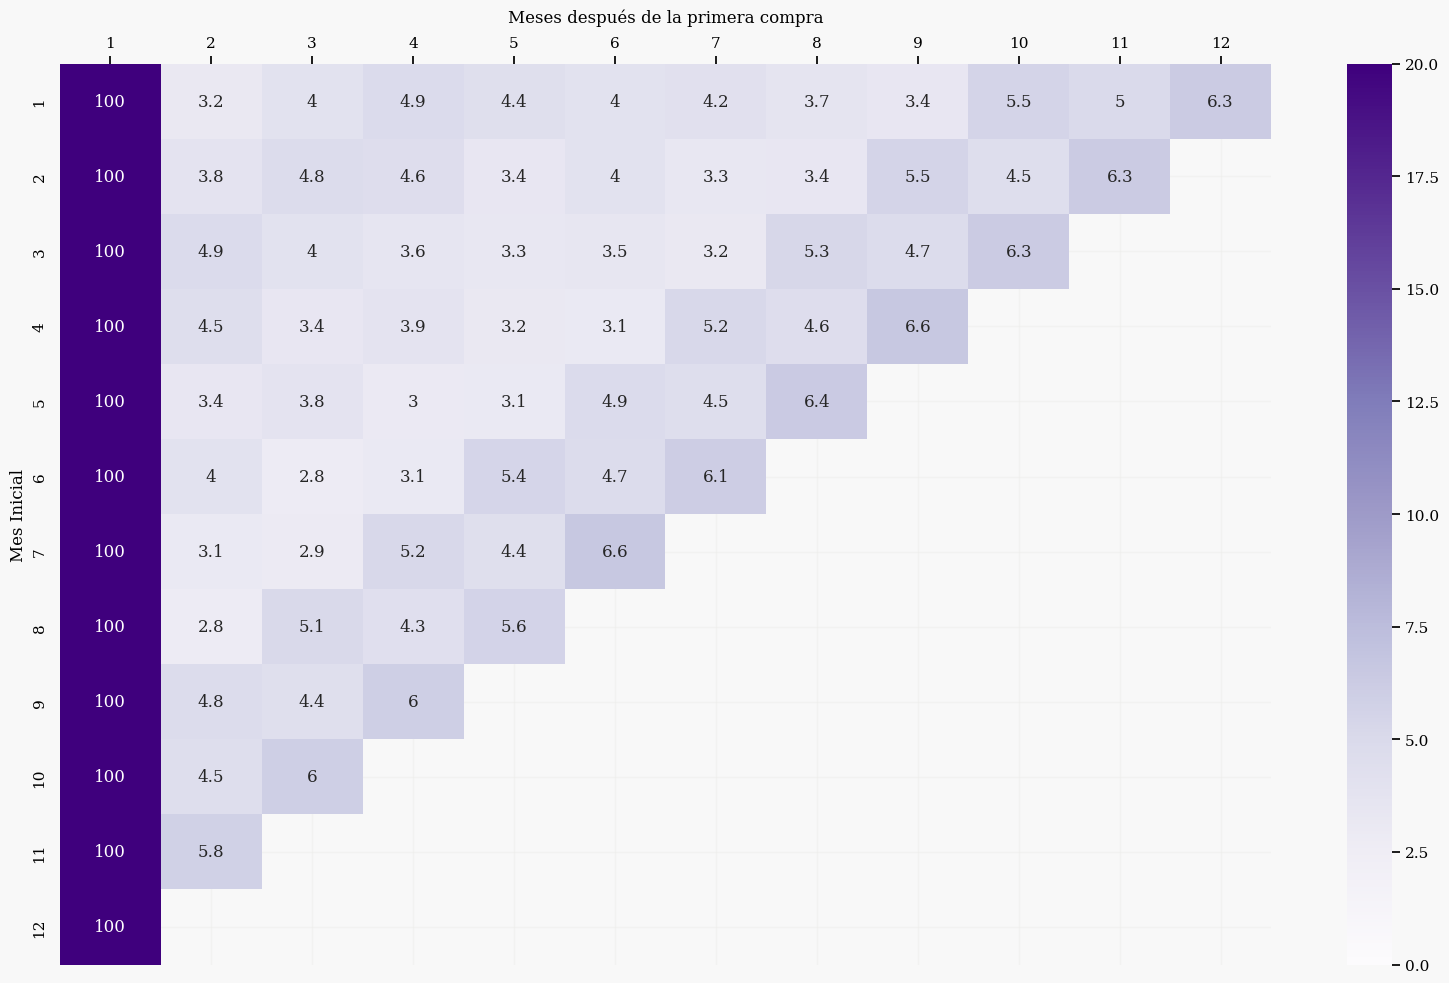

In [32]:
# Crear un nuevo dataframe con el cliente y el mes de la compra
c = df[['purchase_address', 'mes']].copy()

# Creación de una columna que indica los meses después del inicio
# c['meses_despues_inicio'] = c.mes

# Agrupación por cliente y cálculo del mes en el que hizo su primera compra
c2 = c.groupby('purchase_address')['mes'].min().reset_index()

# Renombrar la columna resultante como 'mes_cohorte'
c2 = c2.rename(columns={'mes':'mes_cohorte'})

# Combinación de los DataFrames 'c' y 'c2' para agregar la columna 'mes_cohorte' al DataFrame original
c3 = pd.merge(left=c, right=c2, how='left', on='purchase_address')

# Cálculo de los meses transcurridos desde la primera compra para cada cliente
c3['meses_despues_primera_compra'] = c3.mes - c3.mes_cohorte

# Selección de las columnas relevantes y eliminación de duplicados
c4 = c3[['purchase_address', 'mes_cohorte', 'meses_despues_primera_compra']]

# Nuestra métrica es saber si ha comprado de nuevo o no, sin importar si lo ha hecho más de una vez, por lo que eliminaremos los duplicados
c4 = c4.drop_duplicates(keep='first')

# Agrupación por mes de cohorte y meses después de la primera compra, contando el número de clientes
c5 = c4.groupby(['mes_cohorte', 'meses_despues_primera_compra'])['purchase_address'].count().unstack(level=1)

# Cálculo del porcentaje de retención para cada cohorte
c6 = c5.divide(c5.iloc[:, 0], axis=0).round(3) * 100

# Ajuste de índices y columnas para mejorar la visualización
c6.columns = c6.columns + 1

# Creación del gráfico de heatmap
plt.figure(figsize=(16, 10))
g = sns.heatmap(data=c6, annot=True, cmap='Purples', fmt='g', vmin=0, vmax=20)

# Título del eje x
plt.xlabel('Meses después de la primera compra', labelpad=10)

# Título del eje y
plt.ylabel('Mes Inicial')

# Ajuste de la posición del título y las etiquetas del eje x
g.xaxis.set_label_position('top')
g.xaxis.set_ticks_position("top")

# Ajuste del diseño del gráfico
plt.tight_layout()


Alrededor del 95% de los clientes no vuelve a realizar una compra en todo el año.

Aunque este porcentaje es muy alto, es normal al tratarse de una tienda que vende productos tecnológicos que se suelen comprar únicamente una vez, salvo algunos productos como las baterías o los cables que sí se suelen comprar con más frecuencia. Aun así, es un punto que se podría mejorar.

Una cosa que sorprende del gráfico es que los clientes vuelven a comprar más en el mes de diciembre, ¿podría ser por la Navidad? Además, en los meses de verano no suelen volver a realizar compras.

### ¿Cuál es el LTV de los clientes?

In [33]:
clientes.gasto_total.describe()

count      140768.0
mean     244.777703
std      399.205088
min            2.99
25%           11.95
50%           99.99
75%          379.99
max         4379.99
Name: gasto_total, dtype: Float64

El LTV medio de un cliente en un año son 100$ por lo que nuestro CPA máximo debe ser esa misma cantidad, para no perder dinero.

### Pero, ¿tenemos que aplicar el mismo CPA a todos los clientes o hay clientes "mejores" o "peores"?

El RFM (Recency - Frequency - Monetary) es un método para clasificar a los clientes en función de tres aspectos:

- Recency: ¿Cuándo fue su última compra o interacción?
- Frequency: ¿Con qué frecuencia compran o interactúan?
- Monetary: ¿Cuánto dinero gastan en total?

Esto ayuda a identificar segmentos de clientes más valiosos y a personalizar estrategias de marketing para ellos.

#### Recency

In [34]:
# Fecha de la última compra
clientes['order_date_max'] = clientes.fecha_ult_compra.dt.date

# ültimo día registrado
max_dia = clientes.order_date_max.max()

# Días transcurridos desde su última compra
clientes['r'] = max_dia - clientes.order_date_max

# Cambiando el tipo a numérico
clientes['r'] = pd.to_numeric(clientes['r'].astype(str).str.split(' ', expand = True).iloc[:, 0], errors='coerce').fillna(0)

# Discretizar la variable para conseguir una puntuación del 1 al 5
clientes['r'] = clientes.r.transform(lambda x: pd.cut(x,5, labels = False)) + 1

# Invertir los valores
clientes['r'] = 6 - clientes['r']
clientes.head()

purchase_address  num_compras    fecha_ult_compra  \
0        1 11th St, Atlanta, GA 30301            1 2019-03-14 07:57:00   
1    1 11th St, Los Angeles, CA 90001            1 2019-10-21 18:33:00   
2  1 11th St, San Francisco, CA 94016            1 2019-09-13 05:33:00   
3    1 12th St, Los Angeles, CA 90001            1 2019-03-19 14:55:00   
4  1 12th St, New York City, NY 10001            1 2019-10-26 12:21:00   

   num_productos  gasto_total tipo_prod_mode         ciudad      estado  \
0              1        11.95          Cable        Atlanta     Georgia   
1              1       1700.0         Laptop    Los Angeles  California   
2              1        700.0          Phone  San Francisco  California   
3              1        150.0     Headphones    Los Angeles  California   
4              1        11.99     Headphones  New York City  Nueva York   

  order_date_max  r  
0     2019-03-14  1  
1     2019-10-21  5  
2     2019-09-13  4  
3     2019-03-19  2  
4     2019-10-26  5

Se invierten los valores, ya que en este caso los valores más bajos, es decir, menos días, significan que el cliente ha comprado recientemente, lo que supondría clientes con mayor valor.




#### Frecuency

In [35]:
# Discretizar la variable número de compras para conseguir un valor del 1 al 5
clientes['f'] = clientes.num_compras.transform(lambda x: pd.cut(x,5, labels = False)) + 1

#### Monetary

In [36]:
# Discretizar la variable gasto total para conseguir un valor del 1 al 5
clientes['m'] = clientes.gasto_total.transform(lambda x: pd.qcut(x,[0, 0.50, 0.60, 0.85, 0.95, 1], labels = False) + 1)

In [37]:
clientes.head()

purchase_address  num_compras    fecha_ult_compra  \
0        1 11th St, Atlanta, GA 30301            1 2019-03-14 07:57:00   
1    1 11th St, Los Angeles, CA 90001            1 2019-10-21 18:33:00   
2  1 11th St, San Francisco, CA 94016            1 2019-09-13 05:33:00   
3    1 12th St, Los Angeles, CA 90001            1 2019-03-19 14:55:00   
4  1 12th St, New York City, NY 10001            1 2019-10-26 12:21:00   

   num_productos  gasto_total tipo_prod_mode         ciudad      estado  \
0              1        11.95          Cable        Atlanta     Georgia   
1              1       1700.0         Laptop    Los Angeles  California   
2              1        700.0          Phone  San Francisco  California   
3              1        150.0     Headphones    Los Angeles  California   
4              1        11.99     Headphones  New York City  Nueva York   

  order_date_max  r  f  m  
0     2019-03-14  1  1  1  
1     2019-10-21  5  1  5  
2     2019-09-13  4  1  4  
3     2019-03-19  2  1  3  
4     2019-10-26  5  1  1

In [38]:
# Crear la variable valor con la suma de las puntuaciones
clientes['valor'] = clientes.r + clientes.f + clientes.m

# Crear una variable con la puntuación de las tres métricas
clientes['RFM'] = clientes.apply(lambda x: str(x.r) + str(x.f) + str(x.m), axis = 1)

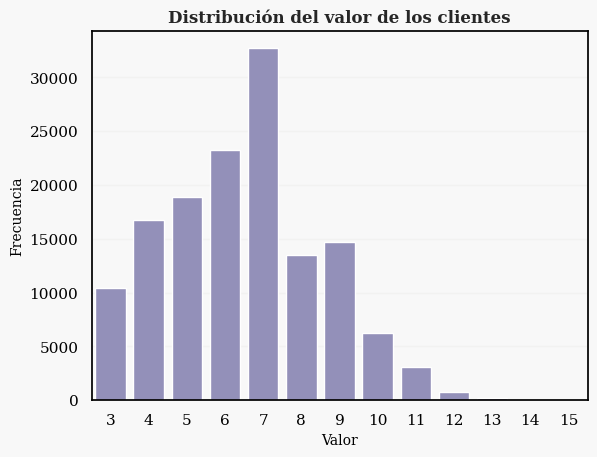

In [39]:
# Histograma de la variable valor
sns.countplot(data=clientes, x='valor', color=color)
plt.title('Distribución del valor de los clientes', fontsize=12, fontweight='bold')
plt.xlabel('Valor', fontsize=10)
plt.ylabel('Frecuencia', fontsize=10)
plt.show()

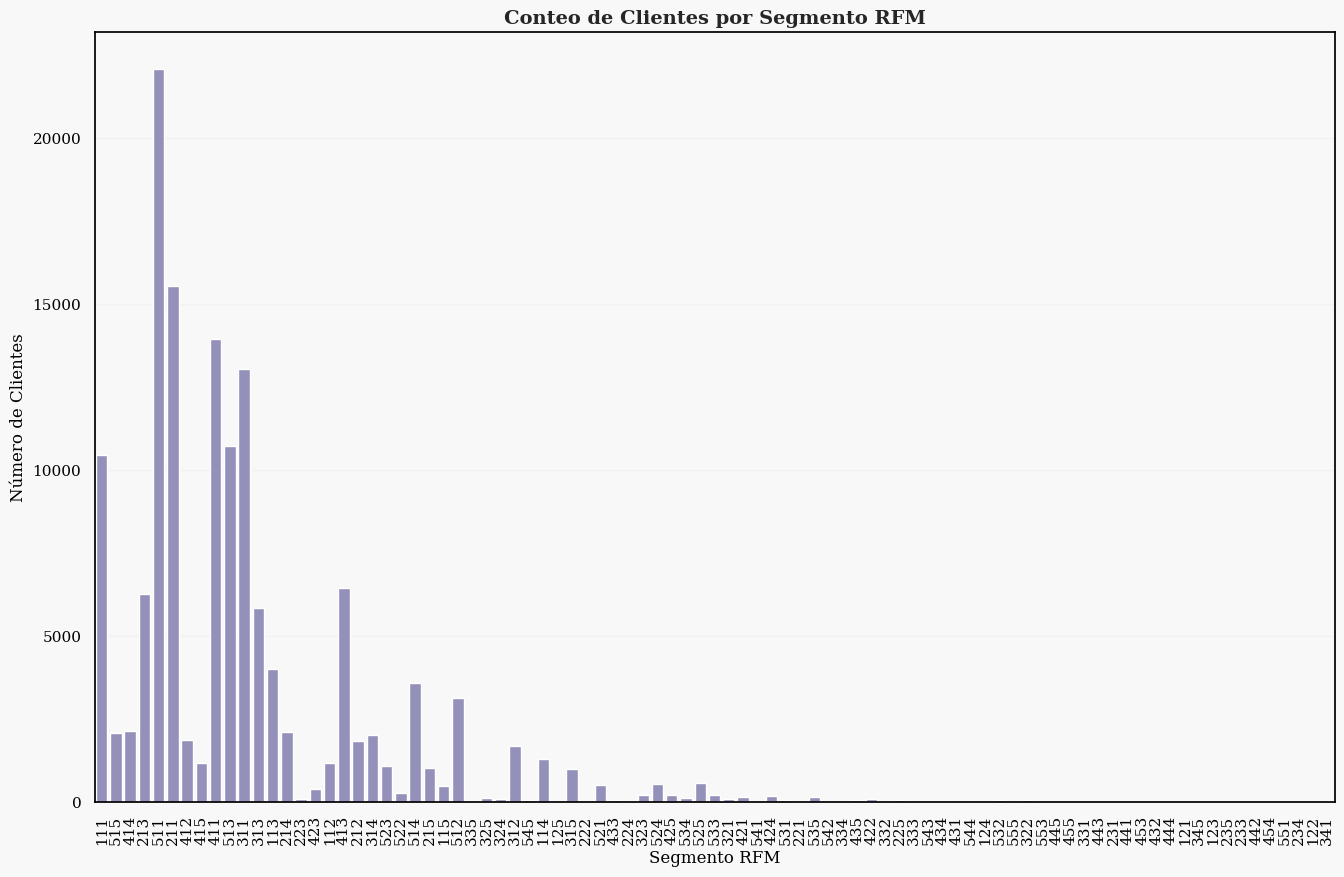

In [40]:
# Número de clientes por cada segmento de RFM
plt.figure(figsize=(16, 10))
sns.countplot(data=clientes, x='RFM', color=color)
plt.title('Conteo de Clientes por Segmento RFM', fontsize=14, fontweight='bold')
plt.xlabel('Segmento RFM', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.xticks(rotation=90)
plt.show()

Los tipos de RFM que mas número de clientes tienen son:
- (5, 4, 3, 2, 1)11: poca frecuencia y poco dinero, en cualquier fecha del año.
- 513: muy poca frecuencia de compra pero recientemente y una cantidad media de dinero gastado.

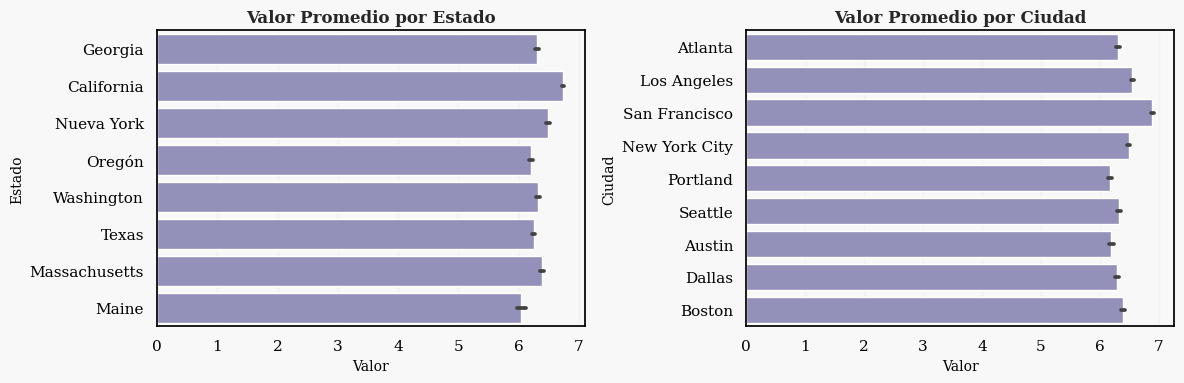

In [41]:
f, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.barplot(ax=ax[0], data=clientes, x='valor', y='estado', color=color)
sns.barplot(ax=ax[1], data=clientes, x='valor', y='ciudad', color=color)

ax[0].set_title('Valor Promedio por Estado', fontsize=12, fontweight='bold')
ax[0].set_xlabel('Valor', fontsize=10)
ax[0].set_ylabel('Estado', fontsize=10)

ax[1].set_title('Valor Promedio por Ciudad', fontsize=12, fontweight='bold')
ax[1].set_xlabel('Valor', fontsize=10)
ax[1].set_ylabel('Ciudad', fontsize=10)

plt.tight_layout()
plt.show()


No parace que haya nada raro en comparacion con los estados y las ciudades.

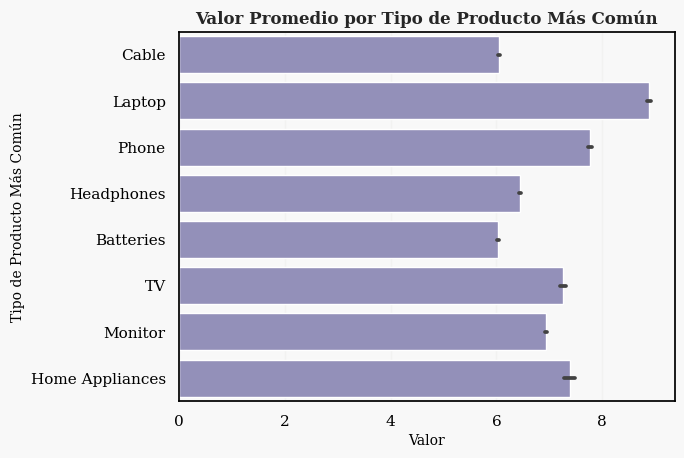

In [42]:
sns.barplot(data=clientes, x='valor', y='tipo_prod_mode', color=color)
plt.title('Valor Promedio por Tipo de Producto Más Común', fontsize=12, fontweight='bold')
plt.xlabel('Valor', fontsize=10)
plt.ylabel('Tipo de Producto Más Común', fontsize=10)
plt.show()

In [43]:
# Creación de un minicubo
metricas = ['num_compras','num_productos','gasto_total', 'tipo_prod_mode']
dimensiones = ['r','f','m','RFM','valor']

minicubo = clientes[dimensiones + metricas]
minicubo = minicubo.melt(id_vars = metricas)

minicubo = minicubo.groupby(['variable','value'], as_index = False).agg({'num_compras':'mean',
                                                              'num_productos':'mean',
                                                              'gasto_total':'mean',
                                                              'tipo_prod_mode':lambda x: x.mode().iat[0]})
minicubo[['num_compras', 'num_productos', 'gasto_total']] = minicubo[['num_compras', 'num_productos', 'gasto_total']].apply(lambda x:round(x, 2))
minicubo

variable value  num_compras  num_productos  gasto_total tipo_prod_mode
0        RFM   111         1.02           1.23        20.57          Cable
1        RFM   112         1.05            1.1        134.5        Monitor
2        RFM   113         1.05           1.12       313.76     Headphones
3        RFM   114         1.07           1.42       790.03          Phone
4        RFM   115         1.14           1.29      1659.75         Laptop
..       ...   ...          ...            ...          ...            ...
110    valor    11         2.15           2.47      1334.27         Laptop
111    valor    12         3.29           3.76      1451.29      Batteries
112    valor    13         4.19           4.81      1549.99      Batteries
113    valor    14         5.04           6.02      1806.65     Headphones
114    valor    15         6.25           7.17      1476.94          Cable

[115 rows x 6 columns]

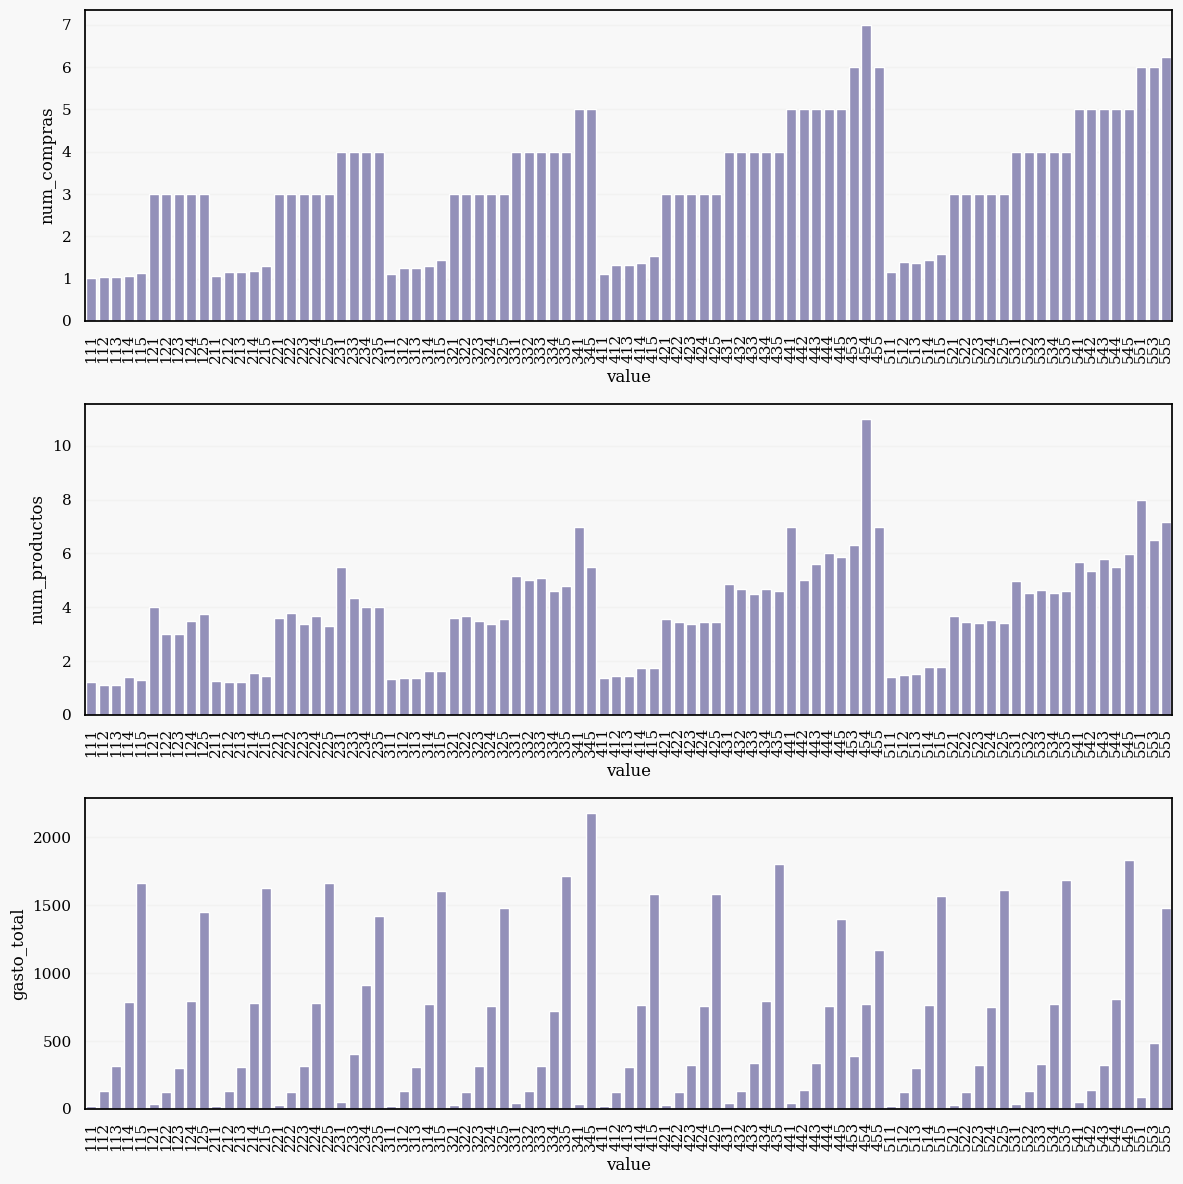

In [44]:
temp = minicubo[minicubo.variable == 'RFM'].set_index('value')
f, ax = plt.subplots(3, 1, figsize = (12,12))
sns.barplot(ax = ax[0], data = temp, x = temp.index, y = 'num_compras', color=color)
sns.barplot(ax = ax[1], data = temp, x = temp.index, y = 'num_productos', color=color)
sns.barplot(ax = ax[2], data = temp, x = temp.index, y = 'gasto_total', color=color)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[1].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[2].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
plt.tight_layout();

Los grupos que más dinero se gastan son: 345, 435 y 545.

In [45]:
mejores = clientes.query('RFM in ["345", "435", "545"]')
mejores.head()

purchase_address  num_compras  \
241        10 Pine St, San Francisco, CA 94016            5   
3528    120 Willow St, San Francisco, CA 94016            4   
3922  123 Lakeview St, San Francisco, CA 94016            5   
4898   13 Lakeview St, San Francisco, CA 94016            5   
5549    133 Willow St, San Francisco, CA 94016            4   

        fecha_ult_compra  num_productos  gasto_total tipo_prod_mode  \
241  2019-12-29 07:12:00              5      1411.96     Headphones   
3528 2019-08-22 17:16:00              4      2105.78      Batteries   
3922 2019-12-06 11:21:00              8      2121.14      Batteries   
4898 2019-12-28 14:11:00              5      2864.94          Cable   
5549 2019-10-15 10:27:00              5      1461.93          Phone   

             ciudad      estado order_date_max  r  f  m  valor  RFM  
241   San Francisco  California     2019-12-29  5  4  5     14  545  
3528  San Francisco  California     2019-08-22  4  3  5     12  435  
3922  San Francisco  California     2019-12-06  5  4  5     14  545  
4898  San Francisco  California     2019-12-28  5  4  5     14  545  
5549  San Francisco  California     2019-10-15  4  3  5     12  435

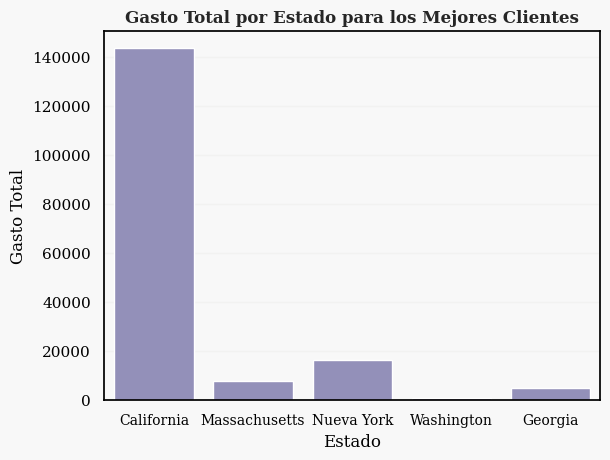

In [46]:
sns.barplot(data=mejores, x='estado', y='gasto_total', estimator='sum', ci=None, color=color)
plt.title('Gasto Total por Estado para los Mejores Clientes', fontsize=12, fontweight='bold')
plt.xlabel('Estado', fontsize=12)
plt.ylabel('Gasto Total', fontsize=12)
plt.xticks(fontsize=10)
plt.show()

Vemos que la gran mayoria de los mejores clientes se encuentran en California.

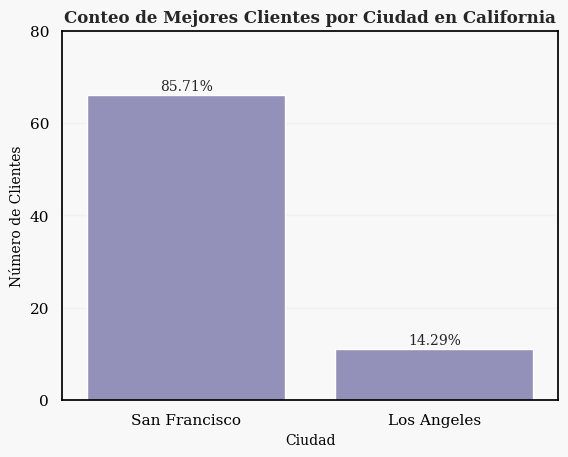

In [47]:
california = mejores.query('estado == "California"')
ax = sns.countplot(data=california, x='ciudad', color=color)
plt.title('Conteo de Mejores Clientes por Ciudad en California', fontsize=12, fontweight='bold')
plt.xlabel('Ciudad', fontsize=10)
plt.ylabel('Número de Clientes', fontsize=10)
plt.yticks([0, 20, 40, 60, 80])

# Agregar porcentajes encima de las barras
total = len(california)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 1, '{:.2f}%'.format((height / total) * 100), ha="center", fontsize = 10)

plt.show()


De los mejores clientes que viven en California, un 85% reside en la ciudad de San Francisco.

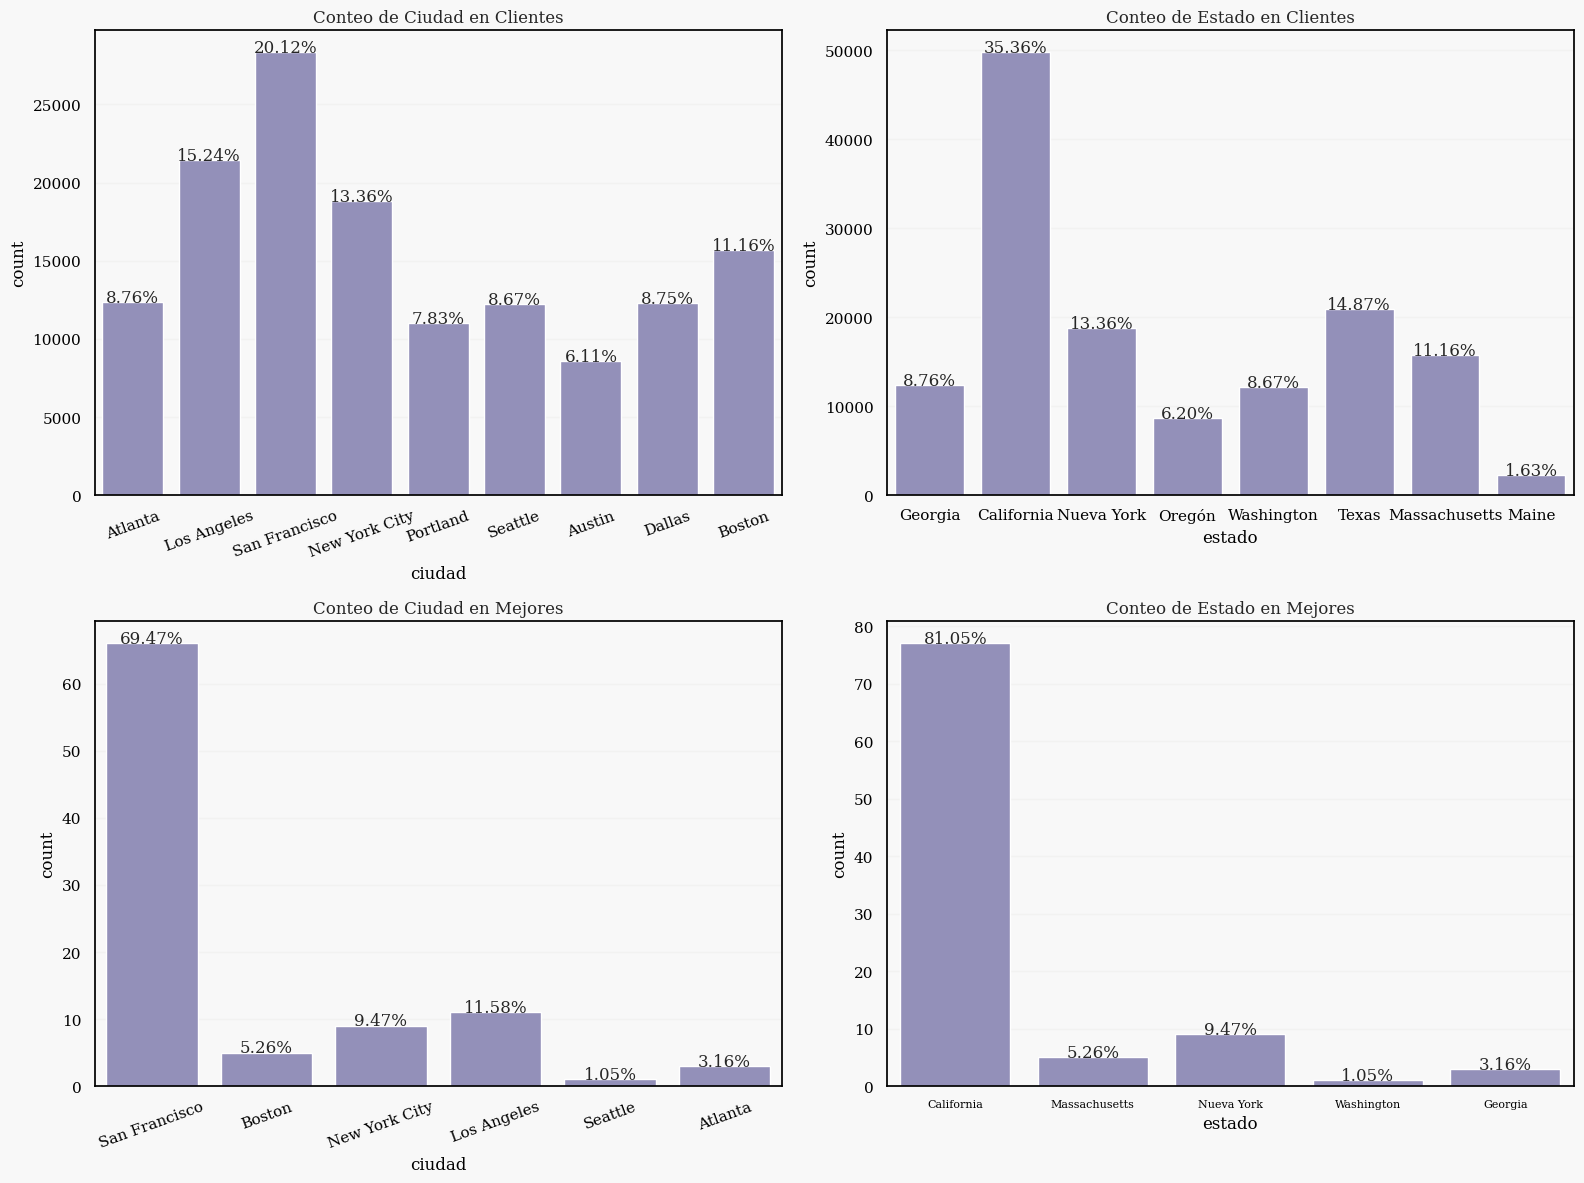

In [48]:
# Crear una figura y ejes para los gráficos
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Ajustar tamaño de las etiquetas del eje x
plt.xticks(fontsize=8)

# Grafico de barras para el conteo de 'ciudad' en el dataset de 'clientes'
sns.countplot(x='ciudad', data=clientes, color=color, ax=axes[0, 0])
axes[0, 0].set_title('Conteo de Ciudad en Clientes')
total = len(clientes['ciudad'])
for p in axes[0, 0].patches:
    height = p.get_height()
    axes[0, 0].text(p.get_x() + p.get_width() / 2., height + 0.05, '{:.2f}%'.format((height / total) * 100), ha="center")

# Ajustar rotación de etiquetas del eje x en el gráfico de conteo de 'ciudad' en 'clientes'
axes[0, 0].tick_params(axis='x', labelrotation=20)

# Grafico de barras para el conteo de 'estado' en el dataset de 'clientes'
sns.countplot(x='estado', data=clientes, color=color, ax=axes[0, 1])
axes[0, 1].set_title('Conteo de Estado en Clientes')
total = len(clientes['estado'])
for p in axes[0, 1].patches:
    height = p.get_height()
    axes[0, 1].text(p.get_x() + p.get_width() / 2., height + 0.05, '{:.2f}%'.format((height / total) * 100), ha="center")

# Grafico de barras para el conteo de 'ciudad' en el dataset de 'mejores'
sns.countplot(x='ciudad', data=mejores, color=color, ax=axes[1, 0])
axes[1, 0].set_title('Conteo de Ciudad en Mejores')
total = len(mejores['ciudad'])
for p in axes[1, 0].patches:
    height = p.get_height()
    axes[1, 0].text(p.get_x() + p.get_width() / 2., height + 0.05, '{:.2f}%'.format((height / total) * 100), ha="center")

# Ajustar rotación de etiquetas del eje x en el gráfico de conteo de 'ciudad' en 'mejores'
axes[1, 0].tick_params(axis='x', labelrotation=20)

# Grafico de barras para el conteo de 'estado' en el dataset de 'mejores'
sns.countplot(x='estado', data=mejores, color=color, ax=axes[1, 1])
axes[1, 1].set_title('Conteo de Estado en Mejores')
total = len(mejores['estado'])
for p in axes[1, 1].patches:
    height = p.get_height()
    axes[1, 1].text(p.get_x() + p.get_width() / 2., height + 0.05, '{:.2f}%'.format((height / total) * 100), ha="center")

# Ajuste de diseño
plt.tight_layout()
plt.show()


Aunque California es el estado con más clientes, lo cual podría influir en que los mejores clientes provengan de allí, observamos una diferencia bastante significativa. Un 35% del total de clientes pertenecen a California, en comparación con un 81% de los mejores clientes.

Lo mismo ocurre en San Francisco, donde el 20% de los clientes son de allí, en contraste con el 69% de los mejores clientes.

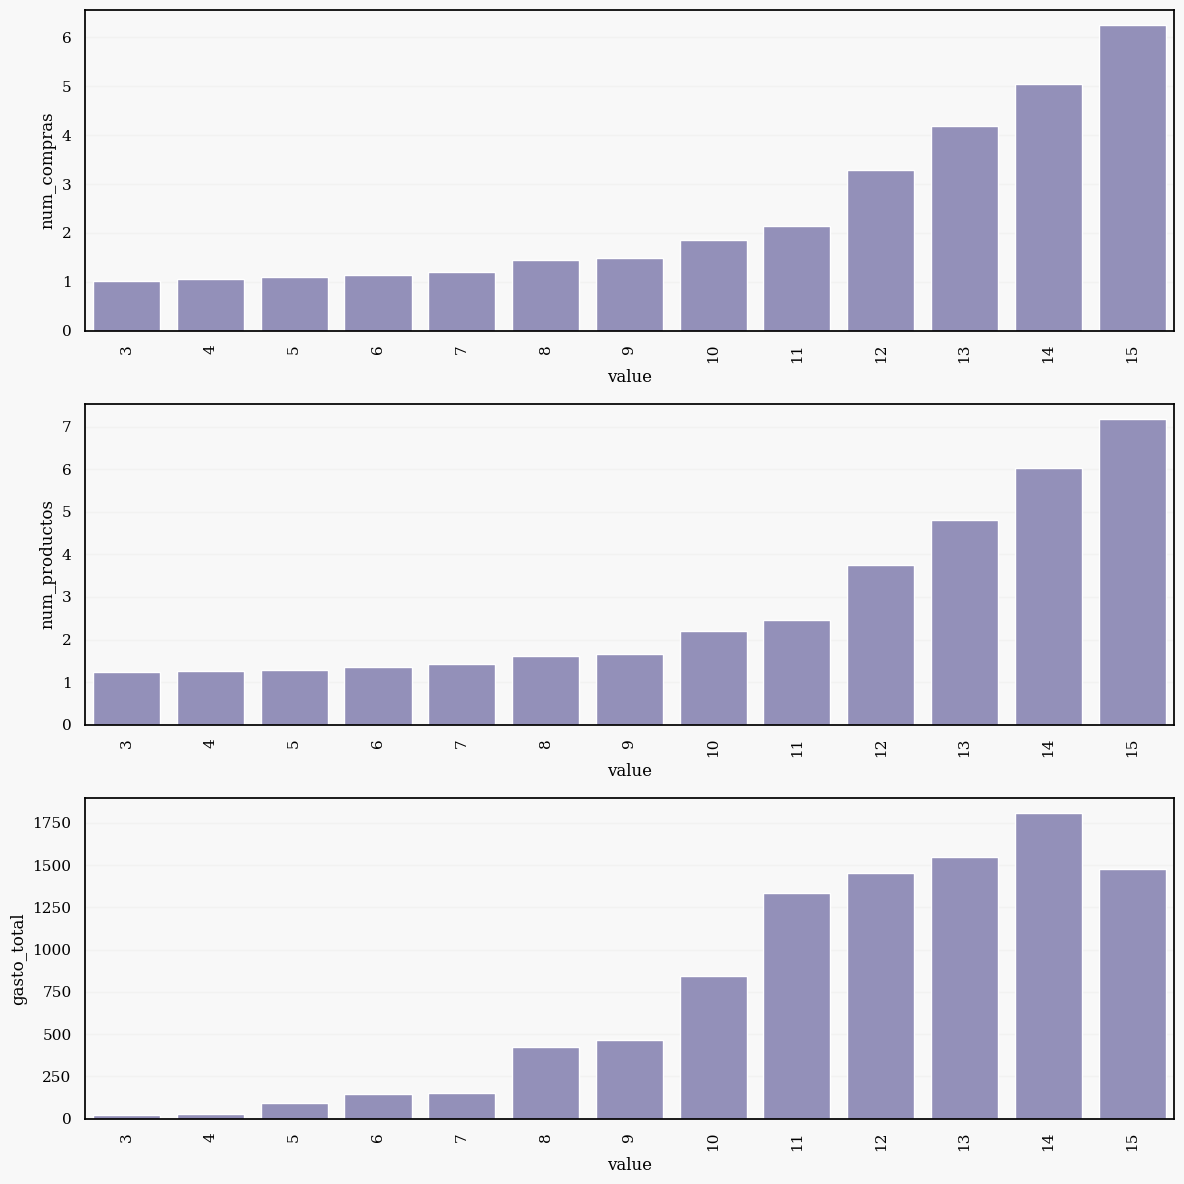

In [49]:
temp = minicubo[minicubo.variable == 'valor'].set_index('value')
f, ax = plt.subplots(3, 1, figsize = (12,12))
sns.barplot(ax = ax[0], data = temp, x = temp.index, y = 'num_compras', color=color)
sns.barplot(ax = ax[1], data = temp, x = temp.index, y = 'num_productos', color=color)
sns.barplot(ax = ax[2], data = temp, x = temp.index, y = 'gasto_total', color=color)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[1].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[2].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
plt.tight_layout();

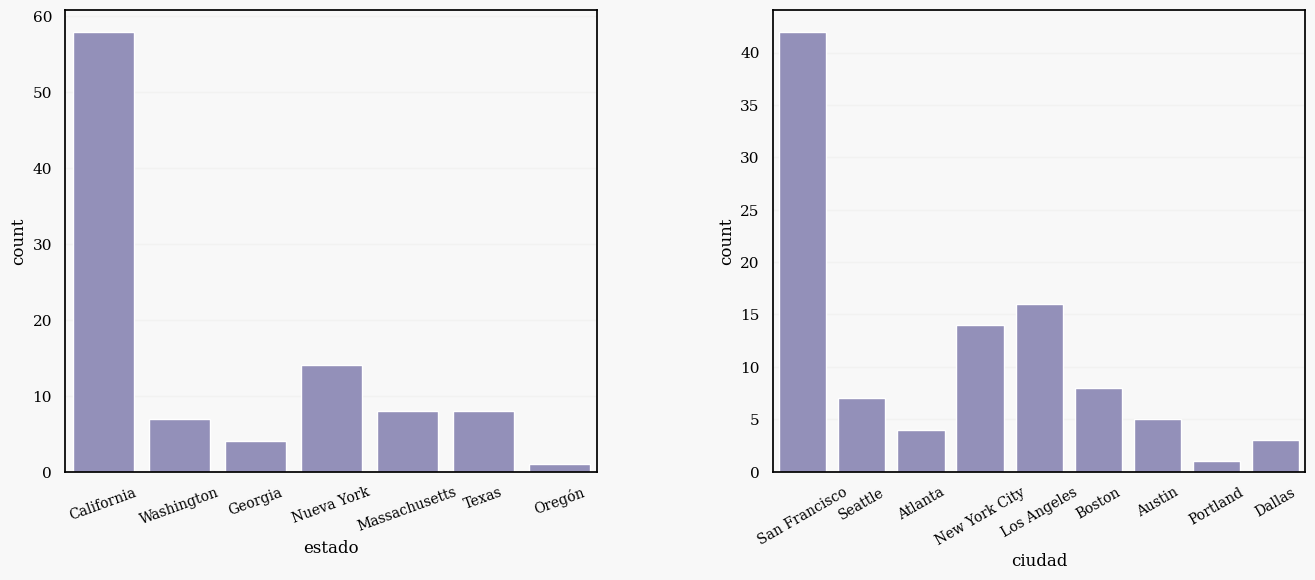

In [50]:
# Comprobar la localización de los 100 clientes con mayor gasto total
clientes_mas_gasto = clientes.gasto_total.nlargest(100).index.to_list()

f, ax = plt.subplots(1, 2, figsize = (16, 6))
sns.countplot(data = clientes.loc[clientes_mas_gasto], x = 'estado', ax = ax[0], color = color)
ax[0].set_xticklabels(ax[0].get_xticklabels(), fontsize = 10, rotation = 20);

sns.countplot(data = clientes.loc[clientes_mas_gasto], x = 'ciudad', ax = ax[1], color = color)
ax[1].set_xticklabels(ax[1].get_xticklabels(), fontsize = 10, rotation = 30);

Con esto podemos comprobar que efectivamente la mayoría de los clientes que más dinero se gastan viven en San Francisco, California.

### 3.2. Producto

In [51]:
df.groupby('purchase_address').agg({'product':'nunique'}).mean()

product    1.289107
dtype: float64

Los clientes compran de media 1,28 productos diferentes.

In [52]:
productos = df.groupby('product').agg({
    'purchase_address': ['count', 'nunique'], # Número de pedidos y número de clientes
    'quantity_ordered': ['sum', 'mean', 'max'], # Número de productos comprados, la media de cada compra y el máximo
    'price_each': 'max', # El precio del producto
    'tipo_producto': 'max', # El tipo del producto
    'estado': lambda x: x.mode().iat[0], # El estado donde más se ha comprado el producto
    'ciudad': lambda x: x.mode().iat[0] # La ciudad donde más se ha comprado el producto
})
productos.columns = ['num_pedidos', 'num_clientes', 'num_comprados', 'media_cantidad', 'max_cantidad', 'precio', 'tipo_producto', 'estado', 'ciudad']
productos

num_pedidos  num_clientes  num_comprados  \
product                                                                
20in Monitor                       4096          4069           4123   
27in 4K Gaming Monitor             6224          6163           6238   
27in FHD Monitor                   7495          7408           7538   
34in Ultrawide Monitor             6174          6121           6192   
AA Batteries (4-pack)             20558         19965          27615   
AAA Batteries (4-pack)            20609         19998          30981   
Apple Airpods Headphones          15521         15196          15633   
Bose SoundSport Headphones        13295         13025          13427   
Flatscreen TV                      4793          4753           4812   
Google Phone                       5521          5470           5528   
LG Dryer                            646           645            646   
LG Washing Machine                  666           665            666   
Lightning Charging Cable          21605         20923          23163   
Macbook Pro Laptop                 4720          4681           4724   
ThinkPad Laptop                    4124          4100           4126   
USB-C Charging Cable              21855         21145          23927   
Vareebadd Phone                    2064          2057           2067   
Wired Headphones                  18848         18303          20520   
iPhone                             6838          6778           6845   

                            media_cantidad  max_cantidad  precio  \
product                                                            
20in Monitor                      1.006592             2  109.99   
27in 4K Gaming Monitor            1.002249             2  389.99   
27in FHD Monitor                  1.005737             2  149.99   
34in Ultrawide Monitor            1.002915             2  379.99   
AA Batteries (4-pack)             1.343273             7    3.84   
AAA Batteries (4-pack)            1.503275             9    2.99   
Apple Airpods Headphones          1.007216             3   150.0   
Bose SoundSport Headphones        1.009929             3   99.99   
Flatscreen TV                     1.003964             2   300.0   
Google Phone                      1.001268             2   600.0   
LG Dryer                               1.0             1   600.0   
LG Washing Machine                     1.0             1   600.0   
Lightning Charging Cable          1.072113             4   14.95   
Macbook Pro Laptop                1.000847             2  1700.0   
ThinkPad Laptop                   1.000485             2  999.99   
USB-C Charging Cable              1.094807             6   11.95   
Vareebadd Phone                   1.001453             2   400.0   
Wired Headphones                   1.08871             4   11.99   
iPhone                            1.001024             2   700.0   

                              tipo_producto      estado         ciudad  
product                                                                 
20in Monitor                        Monitor  California  San Francisco  
27in 4K Gaming Monitor              Monitor  California  San Francisco  
27in FHD Monitor                    Monitor  California  San Francisco  
34in Ultrawide Monitor              Monitor  California  San Francisco  
AA Batteries (4-pack)             Batteries  California  San Francisco  
AAA Batteries (4-pack)            Batteries  California  San Francisco  
Apple Airpods Headphones         Headphones  California  San Francisco  
Bose SoundSport Headphones       Headphones  California  San Francisco  
Flatscreen TV                            TV  California  San Francisco  
Google Phone                          Phone  California  San Francisco  
LG Dryer                    Home Appliances  California  San Francisco  
LG Washing Machine          Home Appliances  California  San Francisco  
Lightning Charging Cable              Cable  California  San Fra

In [53]:
print('Hay ' + str(productos.shape[0]) + ' productos diferentes en el catalogo.')

Hay 19 productos diferentes en el catalogo.


#### ¿Cuáles son los productos que más y que menos se venden?

In [54]:
# Top 5 productos más comprados
productos.num_comprados.nlargest()

product
AAA Batteries (4-pack)      30981
AA Batteries (4-pack)       27615
USB-C Charging Cable        23927
Lightning Charging Cable    23163
Wired Headphones            20520
Name: num_comprados, dtype: Int64

In [55]:
# Top 5 productos menos comprados
productos.num_comprados.nsmallest()

product
LG Dryer               646
LG Washing Machine     666
Vareebadd Phone       2067
20in Monitor          4123
ThinkPad Laptop       4126
Name: num_comprados, dtype: Int64

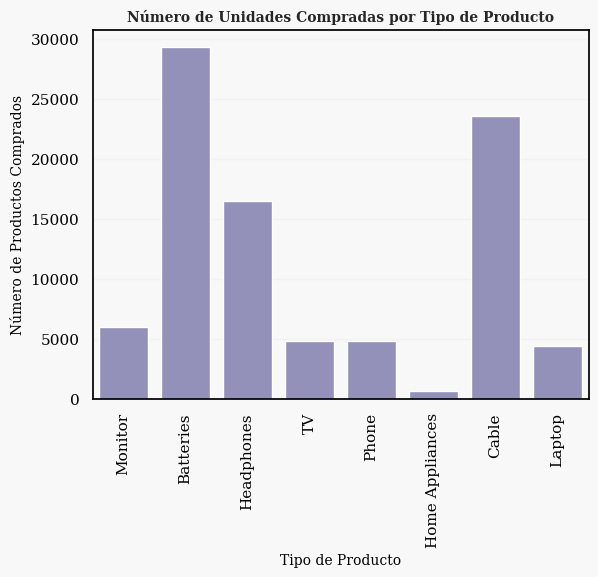

In [56]:
sns.barplot(data=productos, x='tipo_producto', y='num_comprados', color=color, ci=None)
plt.title('Número de Unidades Compradas por Tipo de Producto', fontsize=10, fontweight='bold')
plt.xlabel('Tipo de Producto', fontsize=10)
plt.ylabel('Número de Productos Comprados', fontsize=10)
plt.xticks(rotation=90)
plt.show()

Los productos que más se venden son las baterías, los cables y los auriculares. Y los que menos se venden son los electrodomésticos, que apenas se venden.

#### ¿Hay productos que se compran regularmente por el mismo cliente?

In [57]:
productos['relacion_pedidos_cliente'] = productos.num_clientes / productos.num_pedidos
productos['relacion_pedidos_cliente'].nsmallest()

product
USB-C Charging Cable        0.967513
Lightning Charging Cable    0.968433
AAA Batteries (4-pack)      0.970353
Wired Headphones            0.971084
AA Batteries (4-pack)       0.971155
Name: relacion_pedidos_cliente, dtype: float64

Estos son los productos que tienen mayor recurrencia, es decir, aquellos que los clientes vuelven a comprar. Son números muy cercanos a uno, por lo que tampoco se vuelven a comprar con frecuencia.

#### ¿Hay productos que se compran muchas unidades en una misma compra?

In [58]:
print('Productos con mayor cantidad de unidades vendidas de media en una sesión: ')
productos.media_cantidad.nlargest()

Productos con mayor cantidad de unidades vendidas de media en una sesión: 


product
AAA Batteries (4-pack)      1.503275
AA Batteries (4-pack)       1.343273
USB-C Charging Cable        1.094807
Wired Headphones             1.08871
Lightning Charging Cable    1.072113
Name: media_cantidad, dtype: Float64

In [59]:
print('Productos con menor cantidad de unidades vendidas de media en una sesión: ')
productos.media_cantidad.nsmallest()

Productos con menor cantidad de unidades vendidas de media en una sesión: 


product
LG Dryer                   1.0
LG Washing Machine         1.0
ThinkPad Laptop       1.000485
Macbook Pro Laptop    1.000847
iPhone                1.001024
Name: media_cantidad, dtype: Float64

#### ¿Existe relacion entre el precio y el volumen de compras?

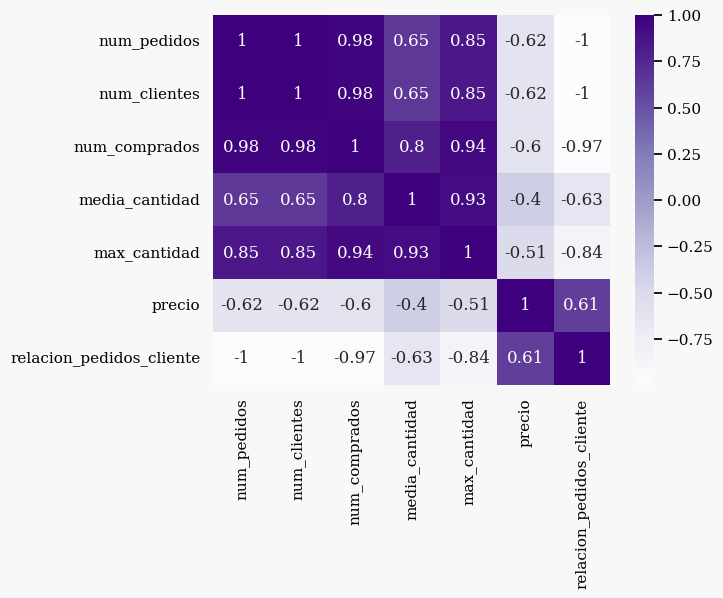

In [60]:
sns.heatmap(data = productos.corr(numeric_only = True), cmap = 'Purples', annot = True);

Después de observar las diferentes correlaciones entre variables, podemos concluir que no hay nada inusual, salvo una pequeña correlación negativa entre el precio y el número de pedidos. Es decir, a mayor precio, menor número de pedidos, y viceversa.

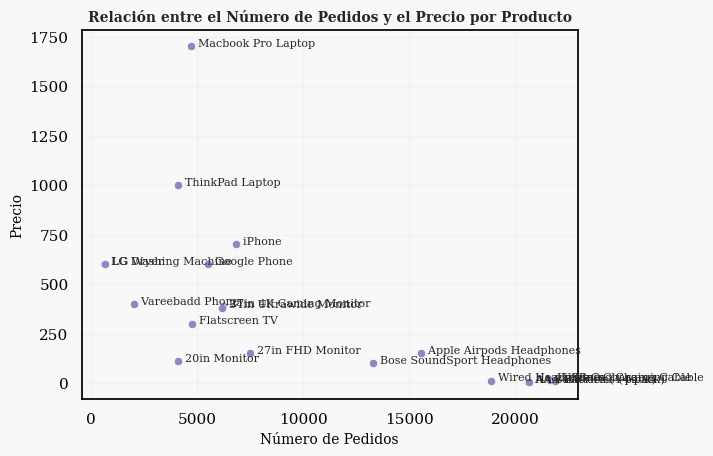

In [61]:
sns.scatterplot(data=productos, x='num_pedidos', y='precio', color=color)

temp = productos.reset_index()

for cada in range(0, productos.shape[0]):
    plt.text(productos['num_pedidos'][cada], productos['precio'][cada], f'  {temp["product"][cada]}', fontsize=8)

plt.title('Relación entre el Número de Pedidos y el Precio por Producto', fontsize=10, fontweight='bold')
plt.xlabel('Número de Pedidos', fontsize=10)
plt.ylabel('Precio', fontsize=10)
plt.show()

### 3.3. Sesión

In [62]:
sesiones = df.groupby(['purchase_address', 'order_date']).agg({
    'precio_compra': 'sum', # Coste total de la sesión
    'quantity_ordered': 'sum', # Cantidad de unidades de productos comprados
    'tipo_producto': lambda x: x.mode().iat[0], # El tipo de producto más comprado
    'estado': 'max', # El estado del cliente
    'ciudad': 'max' # La ciudad del cliente
}).reset_index()
sesiones.head()

purchase_address          order_date  precio_compra  \
0        1 11th St, Atlanta, GA 30301 2019-03-14 07:57:00          11.95   
1    1 11th St, Los Angeles, CA 90001 2019-10-21 18:33:00         1700.0   
2  1 11th St, San Francisco, CA 94016 2019-09-13 05:33:00          700.0   
3    1 12th St, Los Angeles, CA 90001 2019-03-19 14:55:00          150.0   
4  1 12th St, New York City, NY 10001 2019-10-26 12:21:00          11.99   

   quantity_ordered tipo_producto      estado         ciudad  
0                 1         Cable     Georgia        Atlanta  
1                 1        Laptop  California    Los Angeles  
2                 1         Phone  California  San Francisco  
3                 1    Headphones  California    Los Angeles  
4                 1    Headphones  Nueva York  New York City

In [63]:
# Análisis descriptivo
sesiones.describe().T

count                           mean  \
order_date          178406  2019-07-18 22:54:35.062161664   
precio_compra     178406.0                     193.137381   
quantity_ordered  178406.0                       1.170202   

                                  min                  25%  \
order_date        2019-01-01 03:07:00  2019-04-16 21:35:30   
precio_compra                    2.99                11.95   
quantity_ordered                  1.0                  1.0   

                                  50%                  75%  \
order_date        2019-07-17 23:13:30  2019-10-26 08:21:15   
precio_compra                   14.95                150.0   
quantity_ordered                  1.0                  1.0   

                                  max         std  
order_date        2019-12-31 23:53:00         NaN  
precio_compra                 3779.99  340.949229  
quantity_ordered                  9.0    0.500435

Como existen atípicos en el precio de compra (productos caros como los ordenadores), podemos decir que, en promedio, por cada sesión se gastan $14.95. Además, en la gran mayoría de sesiones solo se compra un producto.

In [64]:
# Creación de nuevas columnas 'año', 'mes', 'día', 'hora', 'minuto'
sesiones['año'] = sesiones['order_date'].dt.year
sesiones['mes'] = sesiones['order_date'].dt.month
sesiones['dia'] = sesiones['order_date'].dt.day
sesiones['hora'] = sesiones['order_date'].dt.hour
sesiones['minuto'] = sesiones['order_date'].dt.minute

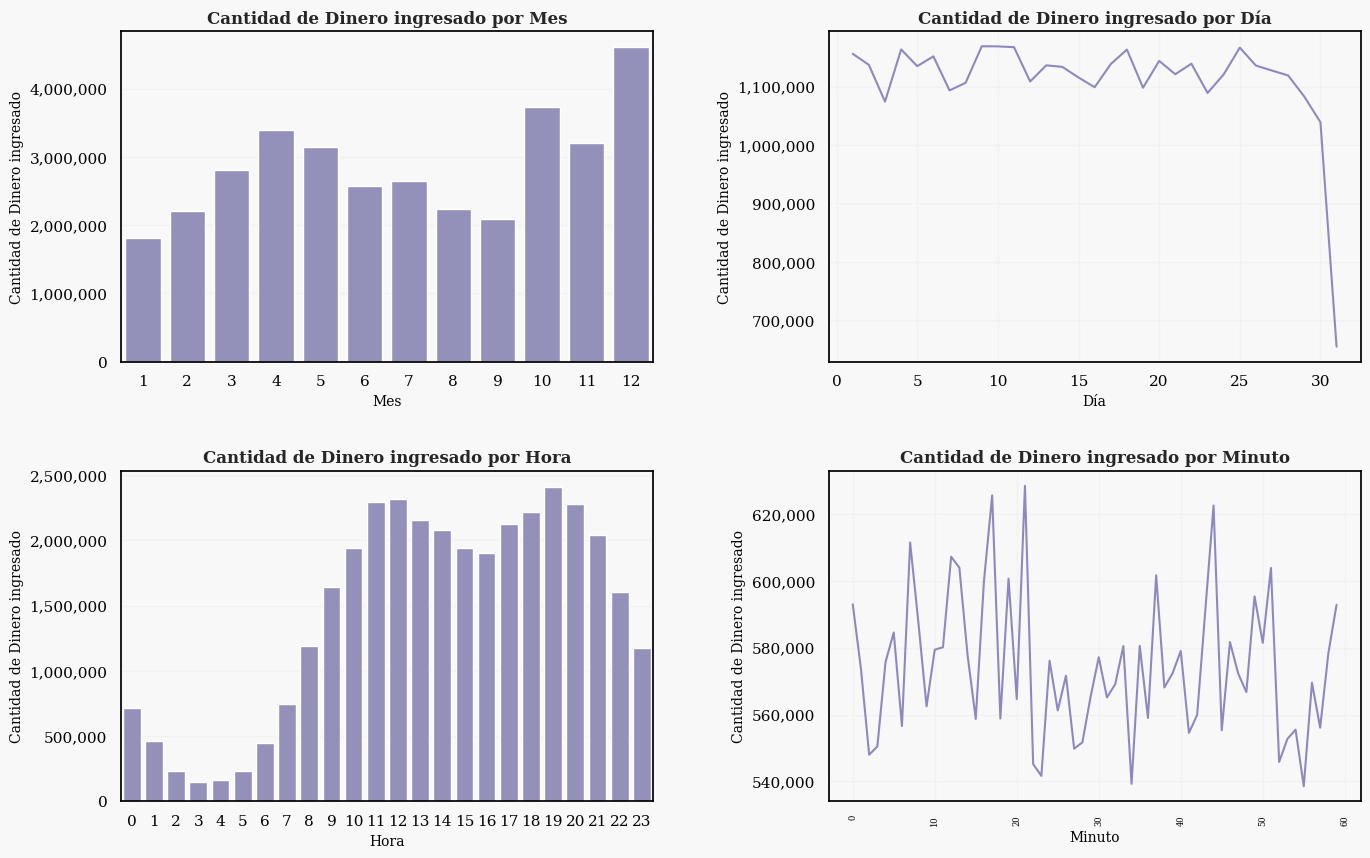

In [65]:
f, ax = plt.subplots(2, 2, figsize=(16, 10))
ax = ax.flatten()

sns.barplot(ax=ax[0], data=sesiones, x='mes', y='precio_compra', estimator='sum', color=color, ci=None)
ax[0].set_title('Cantidad de Dinero ingresado por Mes', fontsize=12, fontweight='bold')
ax[0].set_xlabel('Mes', fontsize=10)
ax[0].set_ylabel('Cantidad de Dinero ingresado', fontsize=10)
ax[0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

sns.lineplot(ax=ax[1], data=sesiones, x='dia', y='precio_compra', estimator='sum', color=color, ci=None)
ax[1].set_title('Cantidad de Dinero ingresado por Día', fontsize=12, fontweight='bold')
ax[1].set_xlabel('Día', fontsize=10)
ax[1].set_ylabel('Cantidad de Dinero ingresado', fontsize=10)
ax[1].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

sns.barplot(ax=ax[2], data=sesiones, x='hora', y='precio_compra', estimator='sum', color=color, ci=None)
ax[2].set_title('Cantidad de Dinero ingresado por Hora', fontsize=12, fontweight='bold')
ax[2].set_xlabel('Hora', fontsize=10)
ax[2].set_ylabel('Cantidad de Dinero ingresado', fontsize=10)
ax[2].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

sns.lineplot(ax=ax[3], data=sesiones, x='minuto', y='precio_compra', estimator='sum', color=color, ci=None)
ax[3].set_title('Cantidad de Dinero ingresado por Minuto', fontsize=12, fontweight='bold')
ax[3].set_xlabel('Minuto', fontsize=10)
ax[3].set_ylabel('Cantidad de Dinero ingresado', fontsize=10)
ax[3].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

ax[3].tick_params(axis='x', rotation=90, labelsize=6)

plt.show()

Vemos que los meses con más ventas son abril, octubre y diciembre, siendo este último mes cuando se disparan las ventas. También podemos observar cómo en los meses de verano y al inicio del año caen las ventas.

En cuanto a las horas, vemos que por la noche, como es normal, no hay apenas ventas, y las horas clave son entre las 11:00 y las 12:00 y las 19:00.

Por último, en los días del mes y los minutos no parece que haya nada extraño o inusual.

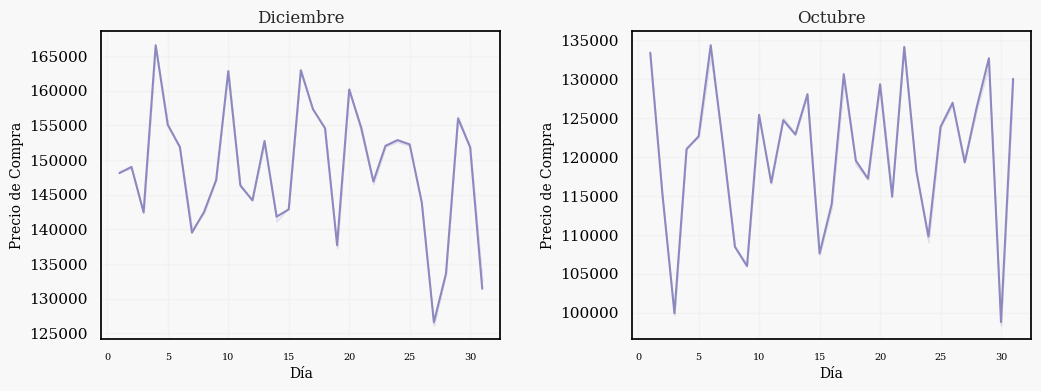

In [66]:
# Crear una figura y ejes para los gráficos
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Diciembre
dic = sesiones.query('mes == 12')
sns.lineplot(data=dic, x='dia', y='precio_compra', estimator='sum', color=color, errorbar=('ci', False), ax=axes[0])
axes[0].set_title('Diciembre', fontsize=12)
axes[0].set_xlabel('Día', fontsize=10)
axes[0].set_ylabel('Precio de Compra', fontsize=10)
axes[0].tick_params(axis='x', labelsize=7)

# Octubre
octu = sesiones.query('mes == 10')
sns.lineplot(data=octu, x='dia', y='precio_compra', estimator='sum', color=color, errorbar=('ci', False), ax=axes[1])
axes[1].set_title('Octubre', fontsize=12)
axes[1].set_xlabel('Día', fontsize=10)
axes[1].set_ylabel('Precio de Compra', fontsize=10)
axes[1].tick_params(axis='x', labelsize=7)

plt.show()

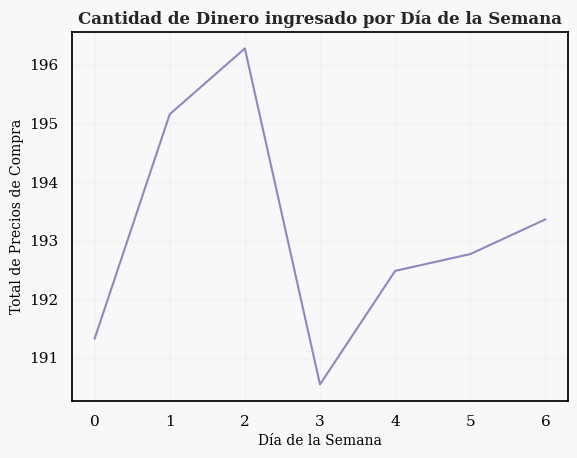

In [67]:
sesiones['dia_sem'] = sesiones.order_date.dt.weekday
sns.lineplot(data=sesiones, x='dia_sem', y='precio_compra', estimator='mean', color=color, ci=None)
plt.title('Cantidad de Dinero ingresado por Día de la Semana', fontsize=12, fontweight='bold')
plt.xlabel('Día de la Semana', fontsize=10)
plt.ylabel('Total de Precios de Compra', fontsize=10)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

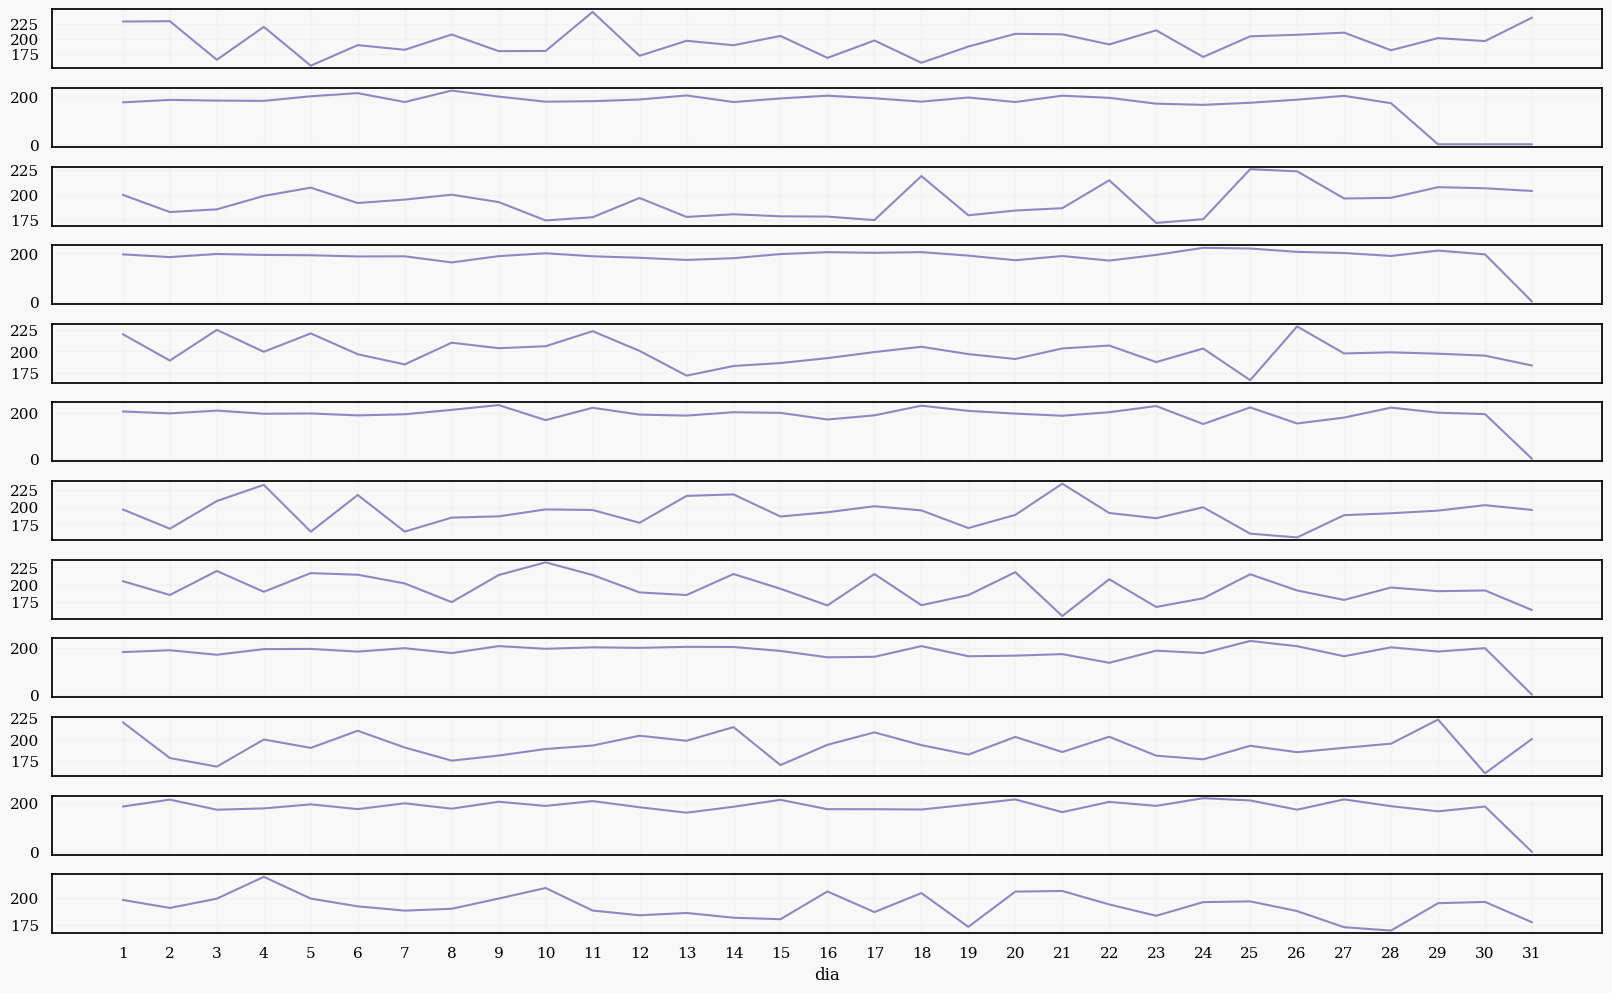

In [68]:
# Gráficos diarios por mes
temp = sesiones.groupby(['mes', 'dia'])[['precio_compra']].mean().unstack(level=0).fillna(0)
temp.plot(subplots=True, sharex=True, figsize=(20, 12), xticks=temp.index, color=color, legend=False);

Por la parte de la fecha, parece que está todo normal, sin ninguna tendencia adicional a las que ya he comentado anteriormente.

### 3.4. Localización

In [69]:
localizacion = df.groupby(['estado', 'ciudad']).agg({
    'precio_compra': 'sum', # Gasto total
    'quantity_ordered': 'sum', # Cantidad de unidades compradas en total
    'order_date': 'nunique', # Número de pedidos
    'tipo_producto': lambda x: x.mode().iat[0] # El tipo de producto más comprado
}).reset_index().rename(columns={'order_date': 'num_pedidos'})
localizacion

estado         ciudad  precio_compra  quantity_ordered  num_pedidos  \
0     California    Los Angeles     5447304.29             33246        27494   
1     California  San Francisco     8252258.67             50156        40543   
2        Georgia        Atlanta     2794199.07             16584        13991   
3          Maine       Portland      449321.38              2746         2351   
4  Massachusetts         Boston     3657300.76             22490        18576   
5     Nueva York  New York City     4660526.52             27887        23087   
6         Oregón       Portland     1869857.57             11289         9494   
7          Texas         Austin     1817544.35             11135         9395   
8          Texas         Dallas     2763659.01             16705        13945   
9     Washington        Seattle     2744896.03             16533        13823   

  tipo_producto  
0    Headphones  
1    Headphones  
2    Headphones  
3    Headphones  
4    Headphones  
5    Headphones  
6    Headphones  
7    Headphones  
8    Headphones  
9    Headphones

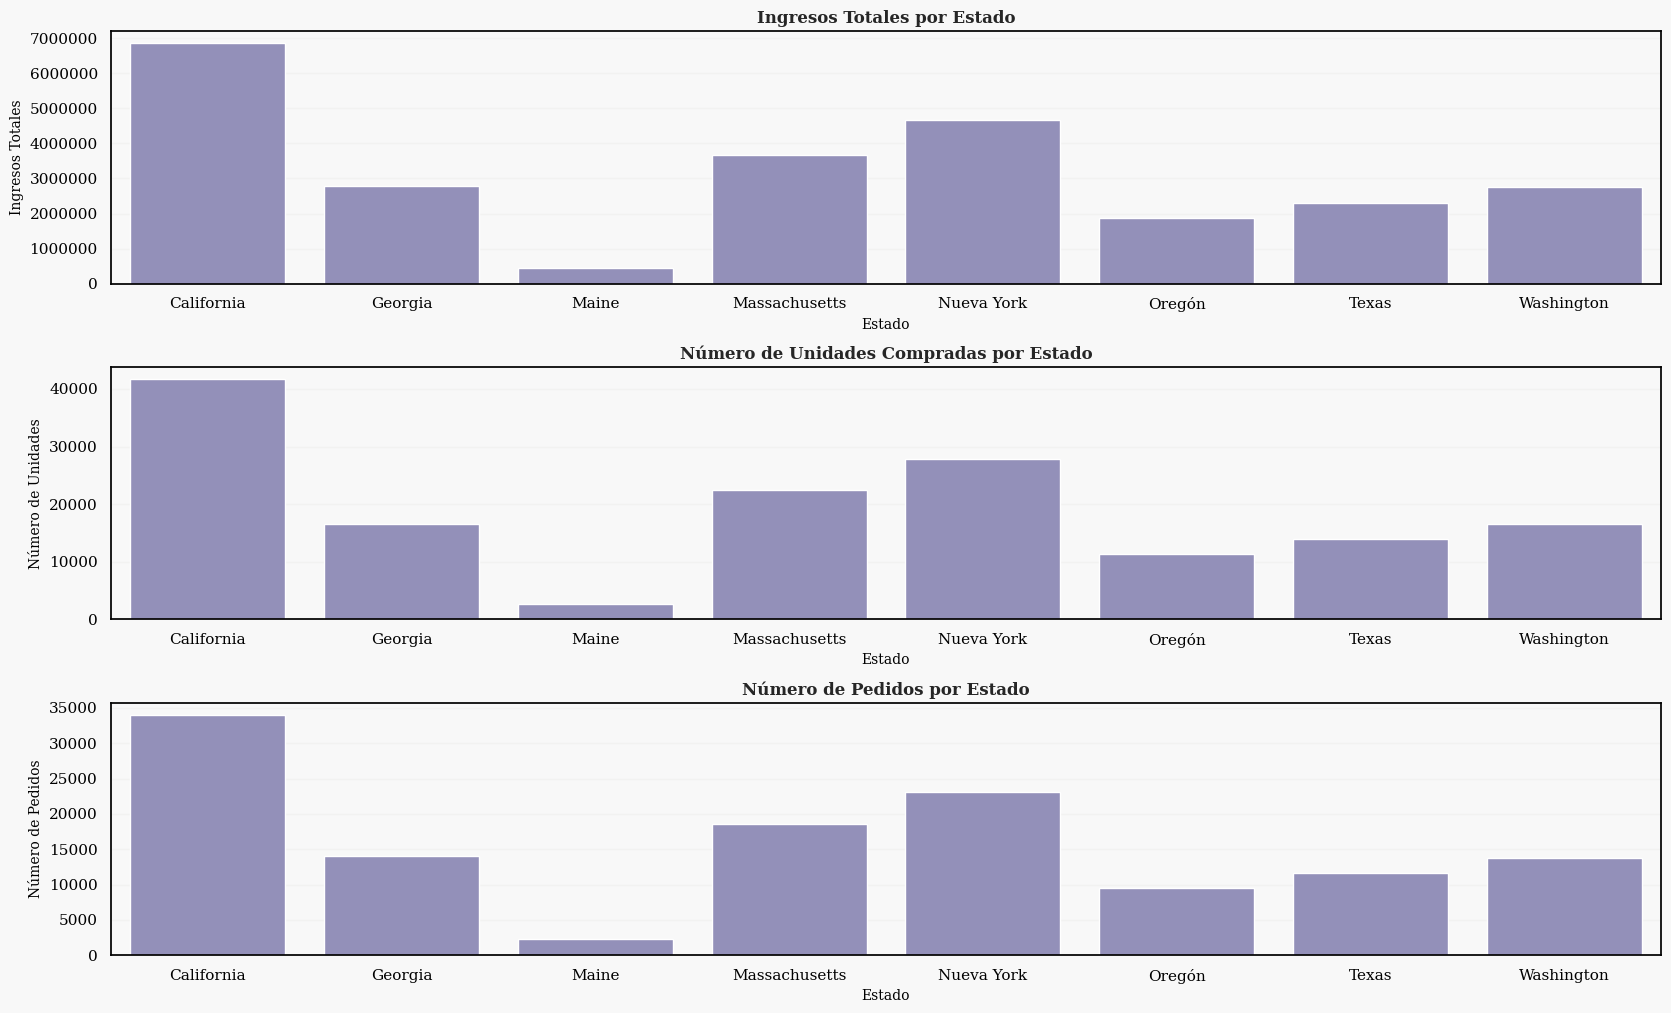

In [70]:
f, ax = plt.subplots(3, 1, figsize=(20, 12))
ax = ax.flatten()

sns.barplot(ax=ax[0], data=localizacion, x='estado', y='precio_compra', estimator='mean', color=color, ci=None)
ax[0].set_title('Ingresos Totales por Estado', fontsize=12, fontweight='bold')
ax[0].set_xlabel('Estado', fontsize=10)
ax[0].set_ylabel('Ingresos Totales', fontsize=10)
ax[0].ticklabel_format(style='plain', axis='y')

sns.barplot(ax=ax[1], data=localizacion, x='estado', y='quantity_ordered', estimator='mean', color=color, ci=None)
ax[1].set_title('Número de Unidades Compradas por Estado', fontsize=12, fontweight='bold')
ax[1].set_xlabel('Estado', fontsize=10)
ax[1].set_ylabel('Número de Unidades', fontsize=10)
ax[1].ticklabel_format(style='plain', axis='y')

sns.barplot(ax=ax[2], data=localizacion, x='estado', y='num_pedidos', estimator='mean', color=color, ci=None)
ax[2].set_title('Número de Pedidos por Estado', fontsize=12, fontweight='bold')
ax[2].set_xlabel('Estado', fontsize=10)
ax[2].set_ylabel('Número de Pedidos', fontsize=10)
ax[2].ticklabel_format(style='plain', axis='y')

plt.show()

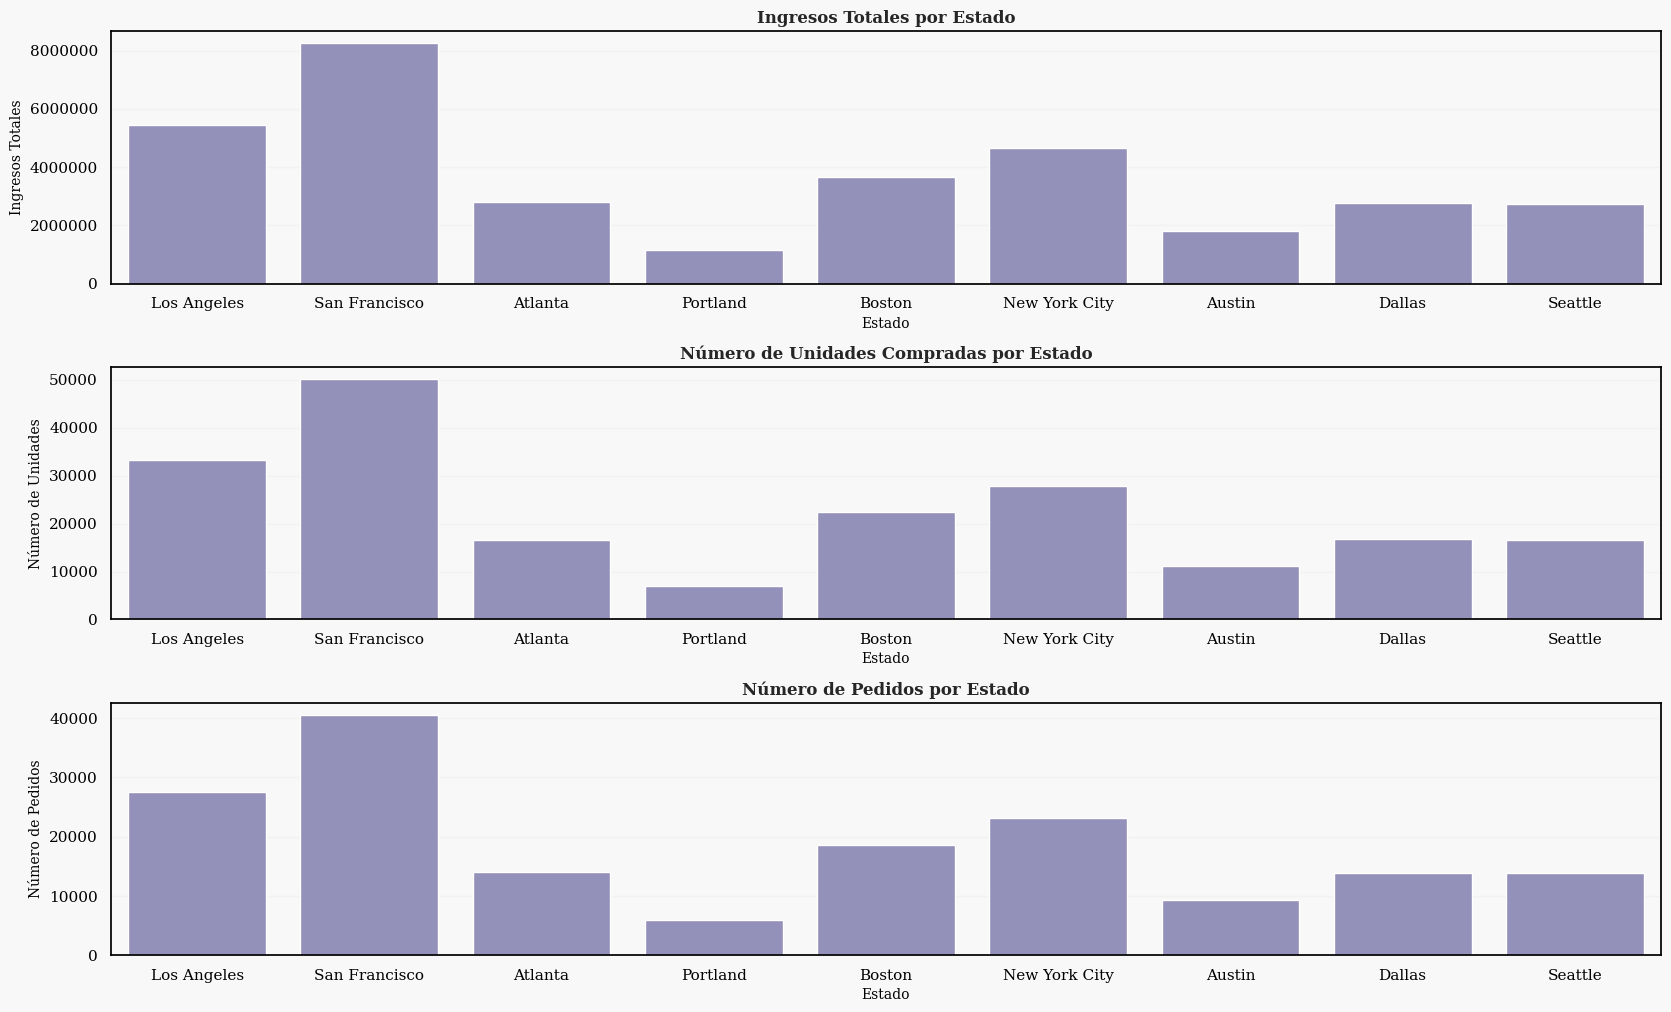

In [71]:
f, ax = plt.subplots(3, 1, figsize=(20, 12))
ax = ax.flatten()

sns.barplot(ax=ax[0], data=localizacion, x='ciudad', y='precio_compra', estimator='mean', color=color, ci=None)
ax[0].set_title('Ingresos Totales por Estado', fontsize=12, fontweight='bold')
ax[0].set_xlabel('Estado', fontsize=10)
ax[0].set_ylabel('Ingresos Totales', fontsize=10)
ax[0].ticklabel_format(style='plain', axis='y')

sns.barplot(ax=ax[1], data=localizacion, x='ciudad', y='quantity_ordered', estimator='mean', color=color, ci=None)
ax[1].set_title('Número de Unidades Compradas por Estado', fontsize=12, fontweight='bold')
ax[1].set_xlabel('Estado', fontsize=10)
ax[1].set_ylabel('Número de Unidades', fontsize=10)
ax[1].ticklabel_format(style='plain', axis='y')

sns.barplot(ax=ax[2], data=localizacion, x='ciudad', y='num_pedidos', estimator='mean', color=color, ci=None)
ax[2].set_title('Número de Pedidos por Estado', fontsize=12, fontweight='bold')
ax[2].set_xlabel('Estado', fontsize=10)
ax[2].set_ylabel('Número de Pedidos', fontsize=10)
ax[2].ticklabel_format(style='plain', axis='y')

plt.show()

Los estados con más compras y más gasto son:
1. California
2. Nueva York
3. Massachusetts

Las ciudades con más compras y más gasto son:
1. San Francisco (California)
2. Los Angeles (California)
3. New York City (Nueva York)

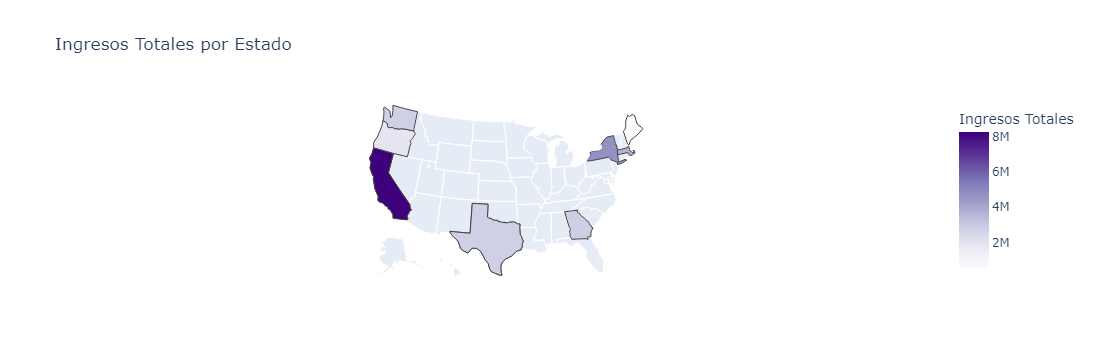

In [72]:
localizacion = pd.merge(left=localizacion, right=estados, how='left', left_on='estado', right_on=0).drop(columns=0).rename(columns={1:'abv'})

# Creación de un mapa para visualizar los ingresos totales por estado
fig = px.choropleth(localizacion,
                    locations='abv', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='precio_compra',
                    color_continuous_scale="Purples",
                    labels={'precio_compra': 'Ingresos Totales'},
                    title='Ingresos Totales por Estado'
                   )
fig.show()

In [73]:
meses = {1: 'enero', 2: 'febrero', 3: 'marzo', 4: 'abril', 5: 'mayo', 6: 'junio',
         7: 'julio', 8: 'agosto', 9: 'septiembre', 10: 'octubre', 11: 'noviembre', 12: 'diciembre'}

sesiones['mes'] = sesiones['mes'].map(meses)

In [74]:
# Guardar datasets para posteriores gráficos en Tableau
sesiones.to_csv('sesiones.csv', index=False)
mejores.to_csv('mejores.csv', index=False)

---

## 4. Conclusiones, Insights y KPIs

#### Conclusiones:

- La gran mayoría de clientes realiza solo una compra, adquiriendo un solo producto en cada transacción.

- Dado que la mayoría de los clientes efectúa una sola compra, el gasto corresponde principalmente al precio del producto, siendo los artículos con un valor inferior a $20 los más populares.

- Se identificaron 39 clientes que adquirieron más de un Macbook Pro a lo largo del año, lo cual es un comportamiento poco común. Será importante monitorear si estos clientes continúan comprando en el próximo año para mantener su fidelidad.

- Aproximadamente el 95% de los clientes no repite compra durante el año.

- Los segmentos de RFM con mayor cantidad de clientes son:
  - (5, 4, 3, 2, 1)11: baja frecuencia de compra y bajo gasto, en cualquier momento del año.
  - 513: baja frecuencia de compra pero reciente y un gasto moderado.<br><br>

- Los grupos de clientes que más dinero gastan son: 345, 435 y 545.

- La mayoría de los mejores clientes se ubican en California.

- Del total de los mejores clientes de California, el 85% reside en la ciudad de San Francisco.

- Los meses con mayor volumen de ventas son abril, octubre y diciembre, siendo este último mes el de mayores ventas. Además, se observa una disminución en las ventas durante los meses de verano y al comienzo del año.

- Las horas de mayor actividad de compra son entre las 11:00 y las 12:00 y entre las 19:00.


#### KPIs:
- En todo el año se han hecho 178406 compras.
  
- En todo el año se han comprado 208771 productos.
  
- En todo el año se han ingresado 34456867.65$.
  
- El LTV medio de un cliente en un año son 100$.
  
- Los clientes compran de media 1,28 productos diferentes.
  
- Los productos que más se venden son las baterías, los cables y los auriculares. Y los que menos se venden son los electrodomésticos, que apenas se venden.
  
- En promedio, se ingresan 14.95$ por sesión.
